In [1]:
import os
import pandas as pd
import seaborn as sns

import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import model as m

### Mask for United Airlines

In [2]:
flights = wrangle.pull_airline_data('UA')

In [3]:
flights.OP_CARRIER.value_counts()

UA    752467
Name: OP_CARRIER, dtype: int64

In [4]:
flights

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
1,2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2,2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
3,2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
4,2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...
752462,2019-12-31,UA,299,DEN,ANC,9.0,0.0,21.0,0.0,0.0,30.0
752463,2019-12-31,UA,288,PHX,EWR,8.0,0.0,0.0,0.0,96.0,104.0
752464,2019-12-31,UA,282,EWR,DEN,31.0,0.0,0.0,0.0,0.0,31.0
752465,2019-12-31,UA,260,SEA,IAD,0.0,0.0,0.0,0.0,43.0,43.0


In [5]:
flights[flights['ORIGIN']=='IAH']

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
44,2009-01-01,UA,375,IAH,DEN,0.0,0.0,15.0,0.0,52.0,67.0
392,2009-01-03,UA,982,IAH,IAD,0.0,0.0,0.0,0.0,32.0,32.0
456,2009-01-04,UA,222,IAH,ORD,0.0,0.0,18.0,0.0,11.0,29.0
590,2009-01-05,UA,375,IAH,DEN,7.0,0.0,8.0,0.0,22.0,37.0
637,2009-01-05,UA,869,IAH,SFO,0.0,0.0,19.0,0.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
752411,2019-12-31,UA,1117,IAH,LAX,64.0,0.0,0.0,0.0,0.0,64.0
752413,2019-12-31,UA,1045,IAH,AUS,22.0,0.0,0.0,0.0,0.0,22.0
752419,2019-12-31,UA,825,IAH,DEN,2.0,0.0,0.0,0.0,37.0,39.0
752449,2019-12-31,UA,438,IAH,SEA,0.0,0.0,17.0,0.0,0.0,17.0


In [6]:
flights

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
1,2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2,2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
3,2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
4,2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...
752462,2019-12-31,UA,299,DEN,ANC,9.0,0.0,21.0,0.0,0.0,30.0
752463,2019-12-31,UA,288,PHX,EWR,8.0,0.0,0.0,0.0,96.0,104.0
752464,2019-12-31,UA,282,EWR,DEN,31.0,0.0,0.0,0.0,0.0,31.0
752465,2019-12-31,UA,260,SEA,IAD,0.0,0.0,0.0,0.0,43.0,43.0


In [7]:
df = wrangle.clean_flight_data_for_average_daily_delay(flights)

/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:103: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_monthly_mean = flights.resample('M').mean().total_delays
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:109: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_daily_mean = pd.DataFrame(flights.resample('D').mean().total_delays)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:124: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future versi

In [8]:
col_to_sum = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']


In [9]:
top_15_hubs = ['ATL',
'DFW',
'DEN',
'ORD',
'LAX',
'JFK',
'IAH',
'PHX',
'EWR',
'SFO',
'SEA',
'IAD',
'PHL',
'CLT',
'MIA']

In [10]:
flights.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
1,2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2,2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
3,2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
4,2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0


 ### Data Types, Shape

In [11]:
flights.shape

(752467, 11)

In [12]:
# seeing all my data types
flights.dtypes


FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAFT_DELAY           float64
row_sums                      float64
dtype: object

In [13]:
# shows the categories for all the columns 
for col in df:
    print(df[col].value_counts())

101.509765    31
82.924974     31
52.500000      4
44.000000      3
55.142857      3
              ..
66.034483      1
56.785714      1
43.477876      1
56.414414      1
41.576271      1
Name: average_delay, Length: 3902, dtype: int64


In [14]:
df.head()

,average_delay
FL_DATE,
2009-01-01,51.248000
2009-01-02,68.795031
2009-01-03,52.456376
2009-01-04,43.675676
2009-01-05,46.297872


## Statistical Summary

In [15]:
flights.describe()

,OP_CARRIER_FL_NUM,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
count,752467.000000,752467.000000,752467.000000,752467.000000,752467.000000,752467.000000,752467.000000
mean,976.295952,17.939793,2.903923,16.424048,0.026400,25.413740,62.707903
std,598.554216,40.116505,21.757668,31.474606,1.575385,49.456025,65.314445
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,472.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
50%,810.000000,4.000000,0.000000,3.000000,0.000000,0.000000,41.000000
75%,1498.000000,20.000000,0.000000,21.000000,0.000000,32.000000,77.000000
max,2833.000000,1405.000000,1239.000000,1041.000000,349.000000,1365.000000,1539.000000


In [16]:
list_of_airports = flights['ORIGIN'].value_counts()
list_of_airports = pd.DataFrame(list_of_airports)
list_of_airports.nunique()

ORIGIN    15
dtype: int64

In [17]:
list_of_airports.head(15)

,ORIGIN
ORD,169283
SFO,111971
DEN,109842
EWR,99459
IAH,96804
LAX,54801
IAD,48113
SEA,17170
PHX,9631
PHL,8546


## Spitting the data

In [18]:
# Split the data
train = df.loc[:'2016'] 
test = df.loc['2016':] 


In [19]:
train

,average_delay
FL_DATE,
2009-01-01,51.248000
2009-01-02,68.795031
2009-01-03,52.456376
2009-01-04,43.675676
2009-01-05,46.297872
...,...
2016-12-27,53.531915
2016-12-28,51.117347
2016-12-29,51.971429


In [20]:
flights.set_index('FL_DATE')

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...
2019-12-31,UA,299,DEN,ANC,9.0,0.0,21.0,0.0,0.0,30.0
2019-12-31,UA,288,PHX,EWR,8.0,0.0,0.0,0.0,96.0,104.0
2019-12-31,UA,282,EWR,DEN,31.0,0.0,0.0,0.0,0.0,31.0


In [21]:
# Split the data
train_fl = flights.set_index('FL_DATE').loc[:'2016'] 
test_fl = flights.set_index('FL_DATE').loc['2016':] 
train_fl.loc['2009-09-30':]

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-09-30,UA,26,LAX,JFK,44.0,0.0,0.0,0.0,0.0,44.0
2009-09-30,UA,33,DEN,SNA,0.0,0.0,3.0,0.0,46.0,49.0
2009-09-30,UA,73,SFO,HNL,25.0,0.0,1.0,0.0,0.0,26.0
2009-09-30,UA,81,LAX,HNL,0.0,0.0,0.0,0.0,328.0,328.0
2009-09-30,UA,100,SFO,IAD,19.0,0.0,0.0,0.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,UA,726,SFO,EWR,0.0,0.0,18.0,0.0,0.0,18.0
2016-12-31,UA,769,ORD,SFO,56.0,0.0,0.0,0.0,0.0,56.0
2016-12-31,UA,775,ORD,DEN,10.0,0.0,9.0,0.0,0.0,19.0


In [22]:
train_fl

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,UA,726,SFO,EWR,0.0,0.0,18.0,0.0,0.0,18.0
2016-12-31,UA,769,ORD,SFO,56.0,0.0,0.0,0.0,0.0,56.0
2016-12-31,UA,775,ORD,DEN,10.0,0.0,9.0,0.0,0.0,19.0


In [23]:
train_fl.tail(50)

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2016-12-31,UA,140,ORD,IAH,0.0,0.0,18.0,0.0,0.0,18.0
2016-12-31,UA,223,SFO,DEN,24.0,0.0,0.0,0.0,0.0,24.0
2016-12-31,UA,235,PHX,IAH,0.0,0.0,0.0,0.0,20.0,20.0
2016-12-31,UA,253,IAH,HNL,13.0,0.0,6.0,0.0,0.0,19.0
2016-12-31,UA,256,SFO,LAX,19.0,0.0,6.0,0.0,0.0,25.0
2016-12-31,UA,260,SEA,IAD,0.0,17.0,0.0,0.0,18.0,35.0
2016-12-31,UA,262,SEA,IAD,9.0,0.0,0.0,0.0,30.0,39.0
2016-12-31,UA,263,DEN,ORD,33.0,0.0,0.0,0.0,0.0,33.0
2016-12-31,UA,264,DEN,PHL,13.0,0.0,0.0,0.0,26.0,39.0


In [24]:
train_fl.dtypes

OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
row_sums               float64
dtype: object

In [25]:
train_fl.dtypes

OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
row_sums               float64
dtype: object

## Sum of Delay Grouped by Date

In [26]:
# Sum the delays grouped by dates
train_fl.groupby('FL_DATE')[col_to_sum].sum()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,2341.0,109.0,875.0,0.0,3081.0
2009-01-02,2964.0,24.0,3170.0,0.0,4918.0
2009-01-03,2461.0,115.0,1582.0,0.0,3658.0
2009-01-04,1561.0,386.0,731.0,0.0,2170.0
2009-01-05,1692.0,223.0,1259.0,0.0,3354.0
...,...,...,...,...,...
2016-12-27,4626.0,0.0,1989.0,0.0,5965.0
2016-12-28,3123.0,14.0,1963.0,0.0,4919.0
2016-12-29,3340.0,24.0,2364.0,0.0,5186.0


In [27]:
pd.DataFrame(train_fl.groupby('FL_DATE')['row_sums'].sum())

,row_sums
FL_DATE,
2009-01-01,6406.0
2009-01-02,11076.0
2009-01-03,7816.0
2009-01-04,4848.0
2009-01-05,6528.0
...,...
2016-12-27,12580.0
2016-12-28,10019.0
2016-12-29,10914.0


## Max Sum values grouped by Date

In [28]:
# Max values of Sum the delays grouped by dates
train_fl.groupby('FL_DATE')[col_to_sum].sum().max()

CARRIER_DELAY          33733.0
WEATHER_DELAY          20679.0
NAS_DELAY              19702.0
SECURITY_DELAY          3149.0
LATE_AIRCRAFT_DELAY    46200.0
dtype: float64

## Mean values grouped by Mean

In [29]:
# Mean values grouped by Date
mean_group = train_fl.groupby('FL_DATE')[col_to_sum].mean()
mean_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,18.728000,0.872000,7.000000,0.0,24.648000
2009-01-02,18.409938,0.149068,19.689441,0.0,30.546584
2009-01-03,16.516779,0.771812,10.617450,0.0,24.550336
2009-01-04,14.063063,3.477477,6.585586,0.0,19.549550
2009-01-05,12.000000,1.581560,8.929078,0.0,23.787234
...,...,...,...,...,...
2016-12-27,19.685106,0.000000,8.463830,0.0,25.382979
2016-12-28,15.933673,0.071429,10.015306,0.0,25.096939
2016-12-29,15.904762,0.114286,11.257143,0.0,24.695238


In [30]:
mean_row_grp = pd.DataFrame(train_fl.groupby('FL_DATE')['row_sums'].mean())
mean_row_grp

,row_sums
FL_DATE,
2009-01-01,51.248000
2009-01-02,68.795031
2009-01-03,52.456376
2009-01-04,43.675676
2009-01-05,46.297872
...,...
2016-12-27,53.531915
2016-12-28,51.117347
2016-12-29,51.971429


# Monthly Averages by Month

In [31]:
sorted_mean_group = mean_group.mean().sort_values(ascending=False)
sorted_mean_group

LATE_AIRCRAFT_DELAY    21.983645
CARRIER_DELAY          19.152468
NAS_DELAY              13.641147
WEATHER_DELAY           1.749541
SECURITY_DELAY          0.043783
dtype: float64

In [32]:
mean_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,18.728000,0.872000,7.000000,0.0,24.648000
2009-01-02,18.409938,0.149068,19.689441,0.0,30.546584
2009-01-03,16.516779,0.771812,10.617450,0.0,24.550336
2009-01-04,14.063063,3.477477,6.585586,0.0,19.549550
2009-01-05,12.000000,1.581560,8.929078,0.0,23.787234
...,...,...,...,...,...
2016-12-27,19.685106,0.000000,8.463830,0.0,25.382979
2016-12-28,15.933673,0.071429,10.015306,0.0,25.096939
2016-12-29,15.904762,0.114286,11.257143,0.0,24.695238


In [33]:
mean_group.groupby(mean_group.index.month).mean()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
1,19.194618,2.411281,13.118104,0.104915,18.329820
2,18.239526,2.475626,14.000378,0.007432,19.134087
3,18.456003,1.186276,13.148722,0.009971,21.538135
4,18.149204,1.178678,14.018931,0.071003,22.262995
5,17.988046,2.170665,14.975651,0.031729,23.114968
6,19.209045,2.215486,14.204919,0.028366,27.263138
7,20.434942,2.368102,13.339615,0.012993,27.388793
8,19.224432,1.797049,12.799462,0.095972,24.903803
9,19.029744,1.263783,14.080430,0.074400,19.432065


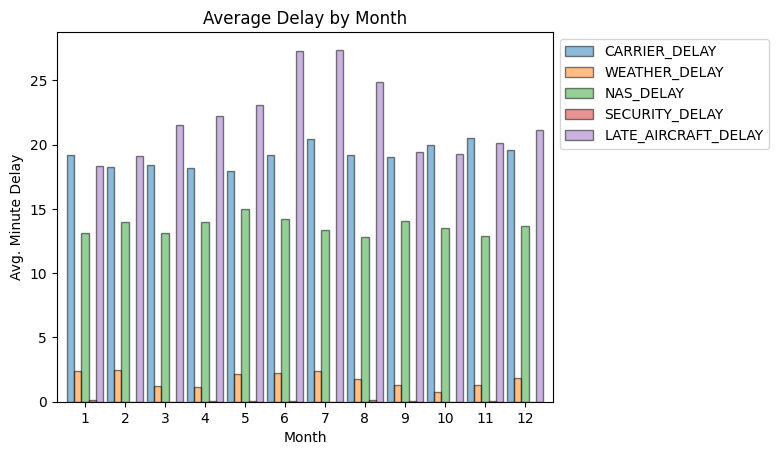

In [34]:
ax = mean_group.groupby(mean_group.index.month).mean().plot.bar(width=.9, ec='black', alpha=0.5)
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.legend(title_fontsize='small', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

In [110]:
train

,average_delay
FL_DATE,
2009-01-01,51.248000
2009-01-02,68.795031
2009-01-03,52.456376
2009-01-04,43.675676
2009-01-05,46.297872
...,...
2016-12-27,53.531915
2016-12-28,51.117347
2016-12-29,51.971429


In [124]:
# Group by 'Category' (in this case, day of the week)
grouped = train.groupby(train.index.month_name())

# Create an empty dictionary to store the groups
group_dict = {}

# Iterate through the groups and populate the dictionary
for name, group in grouped:
    print(name)
    print(group)
    group_dict[f'Category {name}'] = group['average_delay'].tolist()
    
# 
monday = group_dict['Category Monday']
tuesday = group_dict['Category Tuesday']
wednesday = group_dict['Category Wednesday']
thursday = group_dict['Category Thursday']
friday = group_dict['Category Friday']
saturday = group_dict['Category Saturday']
sunday = group_dict['Category Sunday']

April
            average_delay
FL_DATE                  
2009-04-01      48.240602
2009-04-02      62.325123
2009-04-03      82.934911
2009-04-04      40.952381
2009-04-05      61.285714
...                   ...
2016-04-26      56.119617
2016-04-27      59.227545
2016-04-28      58.945205
2016-04-29      63.142857
2016-04-30      71.607843

[240 rows x 1 columns]
August
            average_delay
FL_DATE                  
2009-08-01      76.622222
2009-08-02      54.279221
2009-08-03      60.510309
2009-08-04      53.570175
2009-08-05      55.323944
...                   ...
2016-08-27      56.000000
2016-08-28      68.218274
2016-08-29      69.898810
2016-08-30      54.105263
2016-08-31      48.772021

[248 rows x 1 columns]
December
            average_delay
FL_DATE                  
2009-12-01      56.261905
2009-12-02      42.250000
2009-12-03      50.904762
2009-12-04      53.114754
2009-12-05      48.642857
...                   ...
2016-12-27      53.531915
2016-12-28      51.1

KeyError: 'Category Monday'

In [125]:
group_dict['Category January']

[51.248,
 68.79503105590062,
 52.45637583892618,
 43.67567567567568,
 46.297872340425535,
 42.823170731707314,
 64.37078651685393,
 72.05882352941177,
 44.49629629629629,
 75.27173913043478,
 59.50349650349651,
 57.2317880794702,
 45.0,
 49.71875,
 61.372549019607845,
 57.32919254658385,
 57.51428571428571,
 48.985611510791365,
 70.85925925925926,
 44.12328767123287,
 45.95454545454545,
 55.58181818181818,
 39.669064748201436,
 52.3469387755102,
 51.82511210762332,
 43.233183856502244,
 54.71028037383178,
 68.79775280898876,
 46.2962962962963,
 52.1375,
 63.46153846153846,
 54.08196721311475,
 66.22388059701493,
 66.84393063583815,
 64.07291666666667,
 51.9375,
 53.34615384615385,
 46.00909090909091,
 40.48514851485149,
 52.1764705882353,
 51.625,
 37.88235294117647,
 39.67058823529412,
 45.20454545454545,
 56.089285714285715,
 53.52173913043478,
 42.888888888888886,
 49.162393162393165,
 61.84,
 54.176991150442475,
 51.528,
 65.05343511450381,
 61.22641509433962,
 52.06741573033708,
 

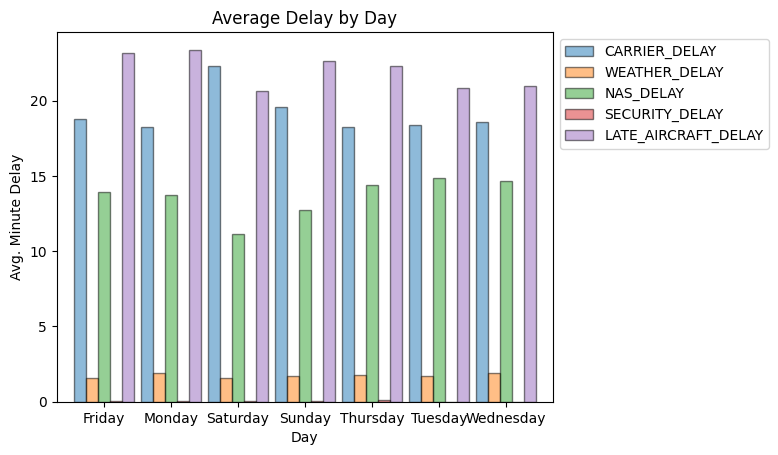

In [35]:
ax = mean_group.groupby(mean_group.index.day_name()).mean().plot.bar(width=.9, ec='black', alpha=0.5)
plt.xticks(rotation=0)
ax.set(title='Average Delay by Day', xlabel='Day', ylabel='Avg. Minute Delay')
plt.legend(title_fontsize='small', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

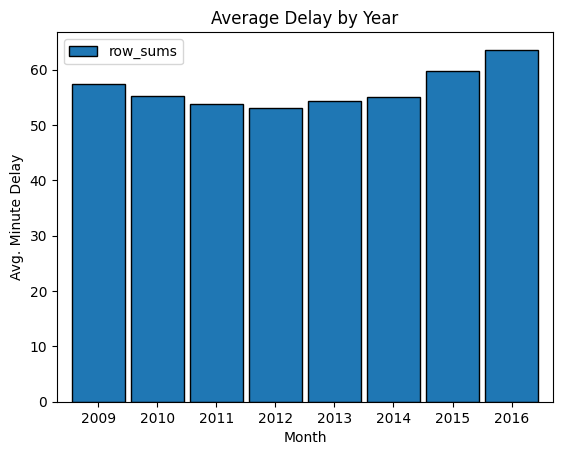

In [36]:
ax = mean_row_grp.groupby(mean_group.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Year', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

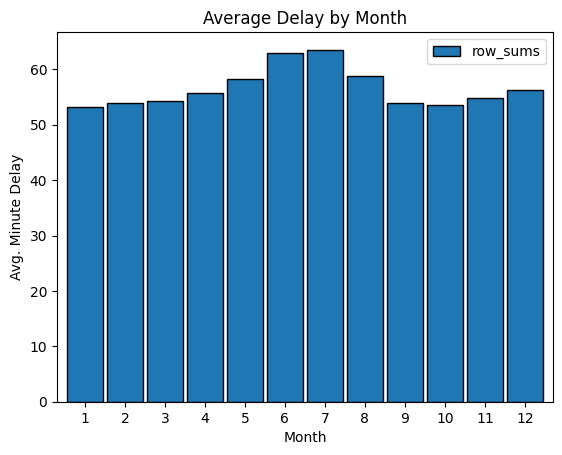

In [37]:
ax = mean_row_grp.groupby(mean_group.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

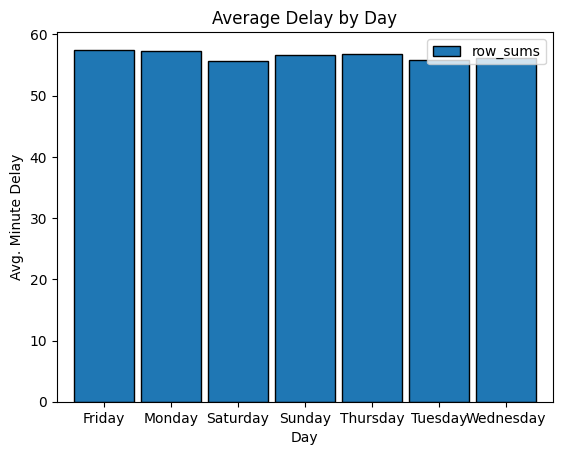

In [38]:
ax = mean_row_grp.groupby(mean_group.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Day', xlabel='Day', ylabel='Avg. Minute Delay')
plt.show()

### Maximim Delay per Delay type

In [39]:
# Max mean value grouped by Date
train_fl.groupby('FL_DATE')[col_to_sum].mean().max()

CARRIER_DELAY          88.151786
WEATHER_DELAY          52.325581
NAS_DELAY              54.259259
SECURITY_DELAY         25.071429
LATE_AIRCRAFT_DELAY    68.973585
dtype: float64

## Sum values grouped by Origin

In [40]:
flights.groupby('ORIGIN')[col_to_sum].sum()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,72298.0,13251.0,193845.0,19.0,163123.0
CLT,30805.0,3385.0,39279.0,0.0,36473.0
DEN,1695481.0,333454.0,1770002.0,1054.0,2765183.0
DFW,132900.0,29603.0,217858.0,171.0,248538.0
EWR,1914576.0,366547.0,1625823.0,5357.0,2688786.0
IAD,925243.0,236819.0,945105.0,3050.0,1011597.0
IAH,1749253.0,404286.0,1594368.0,604.0,2130958.0
JFK,67915.0,15862.0,143905.0,744.0,77278.0
LAX,1022315.0,21204.0,914685.0,6507.0,1328374.0


In [41]:
pd.DataFrame(flights.groupby('ORIGIN')['row_sums'].sum())

,row_sums
ORIGIN,
ATL,442536.0
CLT,109942.0
DEN,6565174.0
DFW,629070.0
EWR,6601089.0
IAD,3121814.0
IAH,5879469.0
JFK,305704.0
LAX,3293085.0


## Mean values grouped by Origin

In [42]:
origin_group = train_fl.groupby('ORIGIN')[col_to_sum].mean()
origin_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,13.624905,1.946631,24.189629,0.007192,27.914459
CLT,15.568726,1.996217,24.968474,0.000000,24.321564
DEN,16.279442,2.359371,14.144681,0.013644,24.681373
DFW,15.722548,2.898891,24.118504,0.037182,27.552077
EWR,20.917588,3.237338,15.176184,0.090598,21.267192
IAD,20.515620,3.750309,18.052134,0.084150,19.613077
IAH,20.007321,2.709143,14.676950,0.009079,20.612564
JFK,12.965827,3.028255,27.473272,0.142039,14.753341
LAX,19.480370,0.339650,15.898375,0.152790,22.920471


In [43]:
origin_row_grp = pd.DataFrame(train_fl.groupby('ORIGIN')['row_sums'].mean())
origin_row_grp = origin_row_grp.sort_values(by='row_sums', ascending=False)
origin_row_grp

,row_sums
ORIGIN,
DFW,70.329202
ATL,67.682816
PHL,66.880983
CLT,66.854981
ORD,62.386592
IAD,62.015290
MIA,61.508995
PHX,61.375233
SEA,60.695904


In [44]:
origin_row_grp.index

Index(['DFW', 'ATL', 'PHL', 'CLT', 'ORD', 'IAD', 'MIA', 'PHX', 'SEA', 'EWR',
       'LAX', 'JFK', 'IAH', 'DEN', 'SFO'],
      dtype='object', name='ORIGIN')

In [45]:
origin_group.sort_values(by='LATE_AIRCRAFT_DELAY', ascending=False)


,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,13.624905,1.946631,24.189629,0.007192,27.914459
DFW,15.722548,2.898891,24.118504,0.037182,27.552077
PHL,16.532488,2.612044,20.799683,0.044849,26.891918
SFO,20.435888,0.451184,10.282178,0.005739,26.188132
ORD,18.992119,3.408462,14.494696,0.005355,25.485961
PHX,15.037446,0.759633,20.509944,0.000932,25.067278
MIA,16.509305,1.451303,18.847084,0.003102,24.698201
DEN,16.279442,2.359371,14.144681,0.013644,24.681373
CLT,15.568726,1.996217,24.968474,0.000000,24.321564


In [46]:
origin_row_grp.row_sums

ORIGIN
DFW    70.329202
ATL    67.682816
PHL    66.880983
CLT    66.854981
ORD    62.386592
IAD    62.015290
MIA    61.508995
PHX    61.375233
SEA    60.695904
EWR    60.688900
LAX    58.791655
JFK    58.362734
IAH    58.015058
DEN    57.478512
SFO    57.363121
Name: row_sums, dtype: float64

In [47]:
[pos for pos in list(range(len(origin_row_grp)))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [48]:
[ht for ht in origin_row_grp.row_sums]

[70.32920200043488,
 67.68281604844815,
 66.88098256735341,
 66.85498108448928,
 62.386591814196315,
 62.01528955309671,
 61.50899503722084,
 61.375233064014914,
 60.695904013239556,
 60.68889998573263,
 58.79165492627031,
 58.36273386788851,
 58.015057544757035,
 57.47851218561385,
 57.36312077857036]

In [49]:
list_of_airports

,ORIGIN
ORD,169283
SFO,111971
DEN,109842
EWR,99459
IAH,96804
LAX,54801
IAD,48113
SEA,17170
PHX,9631
PHL,8546


In [50]:
sorted_list = list_of_airports.sort_values(by='ORIGIN', ascending=False)
sorted_list = list_of_airports.index.to_list()
sorted_list

['ORD',
 'SFO',
 'DEN',
 'EWR',
 'IAH',
 'LAX',
 'IAD',
 'SEA',
 'PHX',
 'PHL',
 'DFW',
 'MIA',
 'ATL',
 'JFK',
 'CLT']

In [51]:
airport_count = pd.DataFrame(train_fl.ORIGIN.value_counts())
airport_count = airport_count.reindex(sorted_list)
airport_count

,ORIGIN
ORD,119524
SFO,73879
DEN,74391
EWR,56072
IAH,62560
LAX,42588
IAD,34795
SEA,12085
PHX,6436
PHL,6310


In [52]:
origin_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,13.624905,1.946631,24.189629,0.007192,27.914459
CLT,15.568726,1.996217,24.968474,0.000000,24.321564
DEN,16.279442,2.359371,14.144681,0.013644,24.681373
DFW,15.722548,2.898891,24.118504,0.037182,27.552077
EWR,20.917588,3.237338,15.176184,0.090598,21.267192
IAD,20.515620,3.750309,18.052134,0.084150,19.613077
IAH,20.007321,2.709143,14.676950,0.009079,20.612564
JFK,12.965827,3.028255,27.473272,0.142039,14.753341
LAX,19.480370,0.339650,15.898375,0.152790,22.920471


### Bar Plot of Airports Delay Times

In [53]:
# pd.DataFrame(sorted_data)

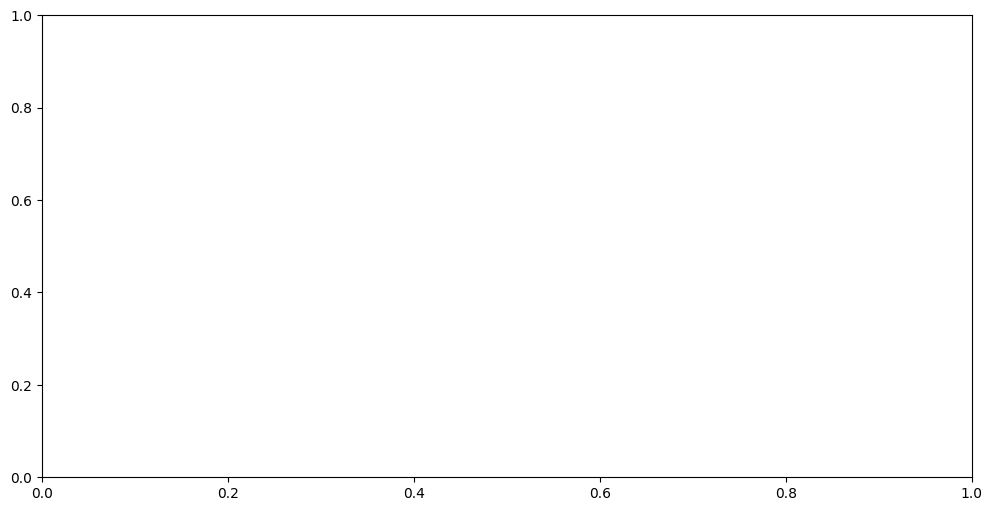

In [54]:
import numpy as np

# Create a sample DataFrame with 12 x-ticks, each containing 5 bars
data = pd.DataFrame(np.random.rand(12, 5), columns=["Bar1", "Bar2", "Bar3", "Bar4", "Bar5"])

# Create a bar graph
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15  # Adjust the width of the bars as needed

x = np.arange(len(data))

# Sort the data within each x-tick group from largest to smallest
sorted_data = data.apply(lambda x: x.sort_values(ascending=False).values, axis=1)

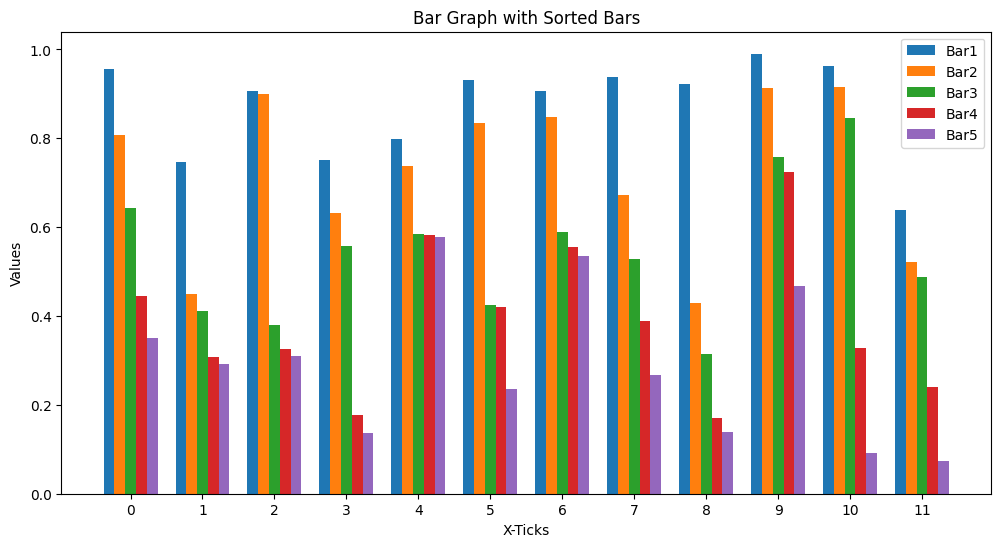

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a sample DataFrame with 12 x-ticks, each containing 5 bars
data = pd.DataFrame(np.random.rand(12, 5), columns=["Bar1", "Bar2", "Bar3", "Bar4", "Bar5"])

# Create a bar graph
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15  # Adjust the width of the bars as needed

x = np.arange(len(data))

# Sort the data within each x-tick group from largest to smallest
sorted_data = data.apply(lambda x: x.sort_values(ascending=False).values, axis=1)

sorted_data = pd.DataFrame(sorted_data.tolist(), columns=["SortedBar1", "SortedBar2", "SortedBar3", "SortedBar4", "SortedBar5"])


# Plot the bars
for i in range(len(sorted_data.columns)):
    ax.bar(x + i * width, sorted_data.iloc[:, i], width, label=f'Bar{i+1}')

# Set the x-tick labels
ax.set_xticks(x + width * ((len(sorted_data.columns) - 1) / 2))
ax.set_xticklabels(data.index)

# Add labels and legend
ax.set_xlabel("X-Ticks")
ax.set_ylabel("Values")
ax.set_title("Bar Graph with Sorted Bars")
ax.legend()

plt.show()


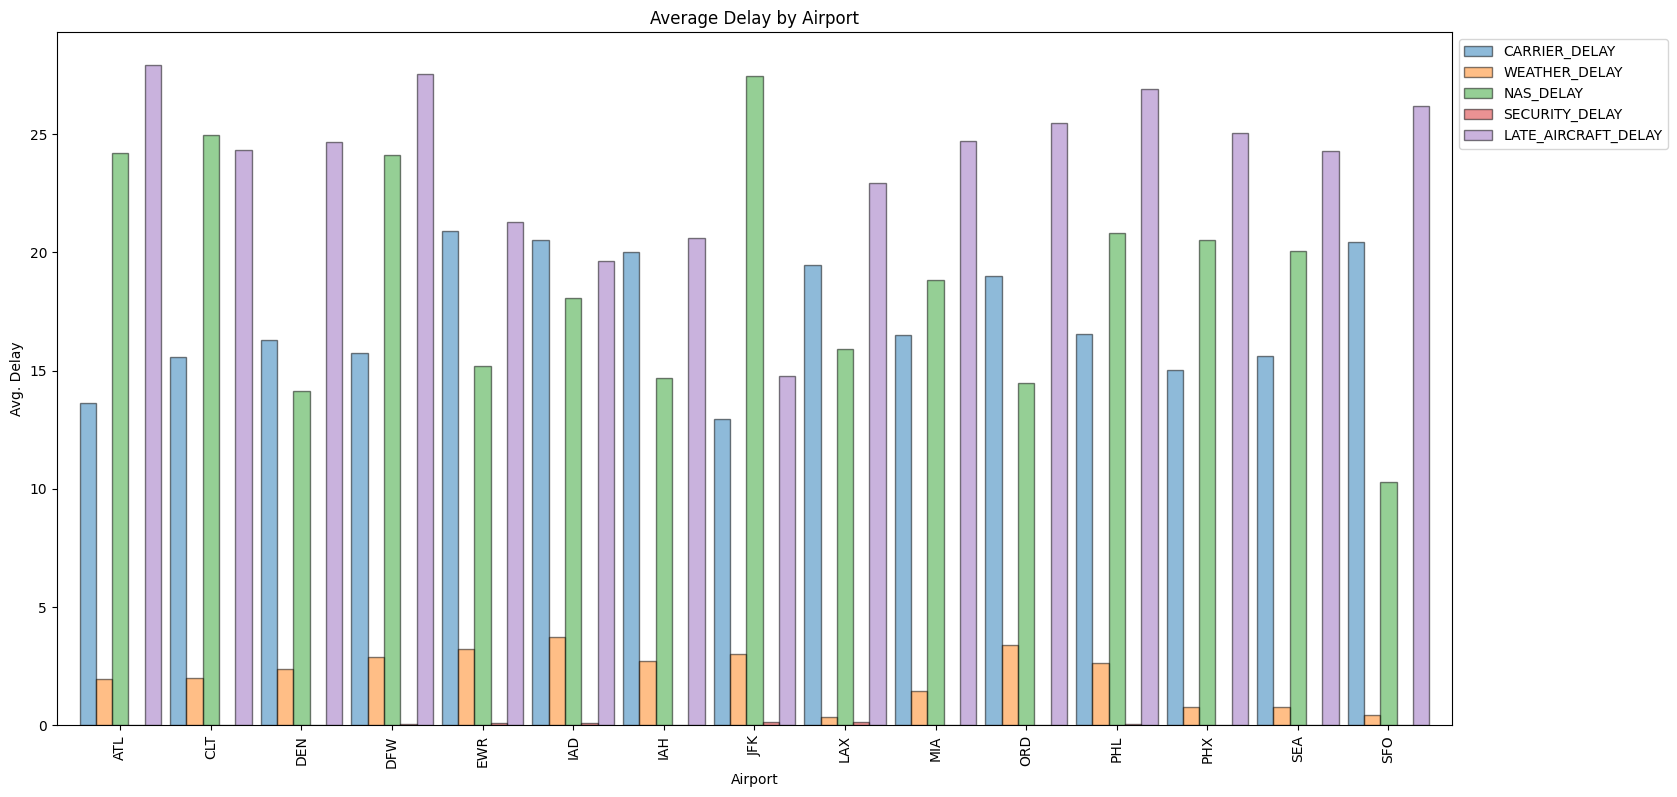

In [56]:
# Create the bar plot
ax = origin_group.plot.bar(width=0.9, ec='black', alpha=.5, figsize=(18, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

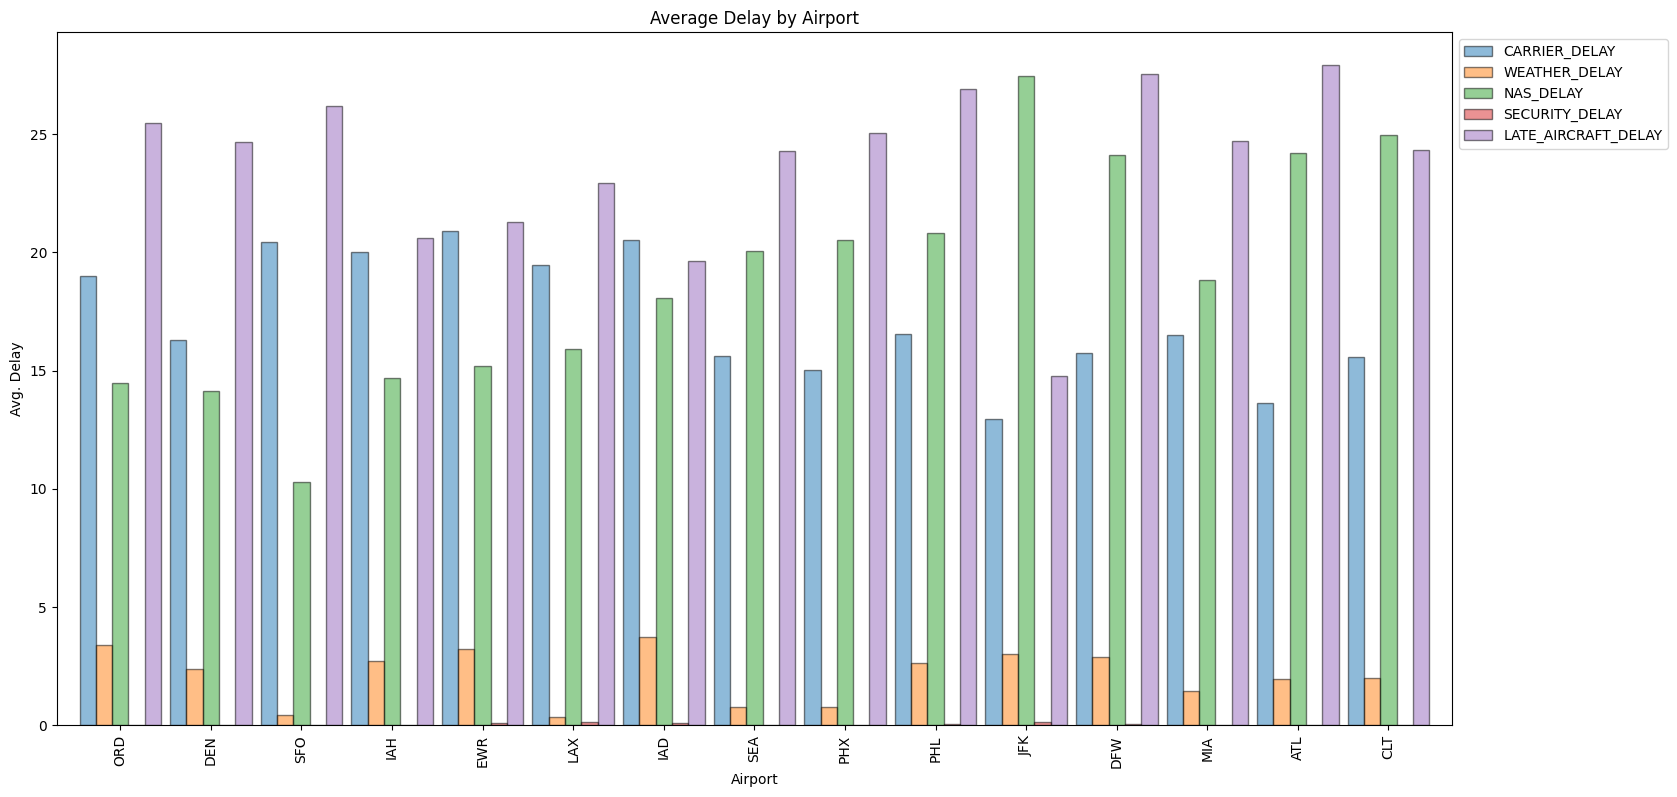

In [57]:
# Create the bar plot
ax = origin_group.reindex(airport_count.sort_values(by='ORIGIN', ascending=False).index).plot.bar(width=0.9, ec='black', alpha=.5, figsize=(18, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

### Bar Plot of Sorted Airports Average Delay Time

In [58]:
sorted_list

['ORD',
 'SFO',
 'DEN',
 'EWR',
 'IAH',
 'LAX',
 'IAD',
 'SEA',
 'PHX',
 'PHL',
 'DFW',
 'MIA',
 'ATL',
 'JFK',
 'CLT']

In [59]:


for airport in sorted_list:
    print(airport)
    print(flights[flights['ORIGIN']==airport]['row_sums'].values)
    
    
    # mean_list.append(flights[flights['ORIGIN']==airport]['row_sums'].values)
    
    airport_dict = {
        airport : flights[flights['ORIGIN']==airport]['row_sums'].tolist()
    }

ORD
[ 22.  22.  16. ... 105.  31.  38.]
SFO
[20. 30. 28. ... 15. 26. 17.]
DEN
[162. 130.  50. ...  16.  55.  30.]
EWR
[49. 27. 51. ... 39. 46. 31.]
IAH
[67. 32. 29. ... 39. 17. 19.]
LAX
[ 45.  18.  39. ...  19.  15. 116.]
IAD
[ 30.  27.  24. ... 171.  61.  19.]
SEA
[16. 16. 50. ... 25. 28. 43.]
PHX
[ 21.  33. 152. ...  29.  37. 104.]
PHL
[47. 18. 62. ... 79. 46. 59.]
DFW
[ 17.  52. 122. ... 122.  59.  20.]
MIA
[19. 15. 30. ... 71. 17. 81.]
ATL
[ 29. 147.  55. ... 100. 138.  24.]
JFK
[ 28.  29. 105. ... 236.  15.  15.]
CLT
[ 79.  31. 165. ...  21. 372.  93.]


In [60]:
flights[flights['ORIGIN']=='ORD']['row_sums'].tolist()

[22.0,
 22.0,
 16.0,
 60.0,
 20.0,
 17.0,
 32.0,
 97.0,
 21.0,
 33.0,
 23.0,
 34.0,
 138.0,
 45.0,
 62.0,
 43.0,
 19.0,
 36.0,
 16.0,
 32.0,
 42.0,
 49.0,
 17.0,
 34.0,
 194.0,
 53.0,
 32.0,
 39.0,
 103.0,
 19.0,
 174.0,
 72.0,
 102.0,
 65.0,
 68.0,
 23.0,
 102.0,
 48.0,
 80.0,
 17.0,
 109.0,
 17.0,
 23.0,
 38.0,
 141.0,
 49.0,
 60.0,
 30.0,
 117.0,
 33.0,
 61.0,
 49.0,
 37.0,
 47.0,
 125.0,
 20.0,
 24.0,
 43.0,
 17.0,
 38.0,
 64.0,
 49.0,
 45.0,
 46.0,
 32.0,
 18.0,
 19.0,
 32.0,
 136.0,
 104.0,
 65.0,
 57.0,
 87.0,
 94.0,
 75.0,
 16.0,
 41.0,
 42.0,
 85.0,
 28.0,
 41.0,
 74.0,
 20.0,
 27.0,
 17.0,
 61.0,
 50.0,
 18.0,
 27.0,
 60.0,
 72.0,
 22.0,
 59.0,
 126.0,
 94.0,
 68.0,
 27.0,
 21.0,
 61.0,
 18.0,
 22.0,
 130.0,
 77.0,
 83.0,
 60.0,
 38.0,
 21.0,
 35.0,
 115.0,
 43.0,
 19.0,
 63.0,
 30.0,
 15.0,
 17.0,
 36.0,
 31.0,
 18.0,
 52.0,
 15.0,
 44.0,
 16.0,
 27.0,
 120.0,
 56.0,
 105.0,
 33.0,
 94.0,
 29.0,
 37.0,
 51.0,
 24.0,
 42.0,
 33.0,
 55.0,
 32.0,
 45.0,
 19.0,
 24.0,
 31.0,
 22

In [61]:
sorted_mean_list = [
 'ORD_mean',
 'SFO_mean',
 'DEN_mean',
 'EWR_mean',
 'IAH_mean',
 'LAX_mean',
 'IAD_mean',
 'SEA_mean',
 'PHX_mean',
 'PHL_mean',
 'DFW_mean',
 'MIA_mean',
 'ATL_mean',
 'JFK_mean',
 'CLT_mean']

In [62]:
# Initialize an empty dictionary
airport_dict = {}  

# Lists of airports
sorted_mean_list = [
 'ORD_mean',
 'SFO_mean',
 'DEN_mean',
 'EWR_mean',
 'IAH_mean',
 'LAX_mean',
 'IAD_mean',
 'SEA_mean',
 'PHX_mean',
 'PHL_mean',
 'DFW_mean',
 'MIA_mean',
 'ATL_mean',
 'JFK_mean',
 'CLT_mean']


for airport in sorted_list:
    
    # Filter rows for the current airport and extract 'row_sums' values
    row_sums_values = flights[flights['ORIGIN'] == airport]['row_sums'].tolist()
    
    # Store 'row_sums' values in the airport_dict
    airport_dict[airport] = row_sums_values
    
for key, var in zip(airport_dict.keys(), sorted_mean_list):
    
    print(var)
    # Variable 
    mean_dict = {
    var : airport_dict[key]
    }
    



ORD_mean
SFO_mean
DEN_mean
EWR_mean
IAH_mean
LAX_mean
IAD_mean
SEA_mean
PHX_mean
PHL_mean
DFW_mean
MIA_mean
ATL_mean
JFK_mean
CLT_mean


In [63]:
# Initialize an empty dictionary
airport_dict = {}

# Lists of airports
sorted_mean_list = [
    'ORD_mean',
    'SFO_mean',
    'DEN_mean',
    'EWR_mean',
    'IAH_mean',
    'LAX_mean',
    'IAD_mean',
    'SEA_mean',
    'PHX_mean',
    'PHL_mean',
    'DFW_mean',
    'MIA_mean',
    'ATL_mean',
    'JFK_mean',
    'CLT_mean'
]

for airport in sorted_list:
    # Filter rows for the current airport and extract 'row_sums' values
    row_sums_values = flights[flights['ORIGIN'] == airport]['row_sums'].tolist()
    
    # Store 'row_sums' values in the airport_dict with the airport mean name as the key
    airport_dict[sorted_mean_list[sorted_list.index(airport)]] = row_sums_values

ORD_mean = airport_dict['ORD_mean']
SFO_mean = airport_dict['SFO_mean']
DEN_mean = airport_dict['DEN_mean']
EWR_mean = airport_dict['EWR_mean']
IAH_mean = airport_dict['IAH_mean']
LAX_mean = airport_dict['LAX_mean']
IAD_mean = airport_dict['IAD_mean']
SEA_mean = airport_dict['SEA_mean']
PHX_mean = airport_dict['PHX_mean']
PHL_mean = airport_dict['PHL_mean']
DFW_mean = airport_dict['DFW_mean']
MIA_mean = airport_dict['MIA_mean']
ATL_mean = airport_dict['ATL_mean']
JFK_mean = airport_dict['JFK_mean']
CLT_mean = airport_dict['CLT_mean']


In [64]:
anova_mean_list = [
    ORD_mean,
    SFO_mean,
    DEN_mean,
    EWR_mean,
    IAH_mean,
    LAX_mean,
    IAD_mean,
    SEA_mean,
    PHX_mean,
    PHL_mean,
    DFW_mean,
    MIA_mean,
    ATL_mean,
    JFK_mean,
    CLT_mean
]

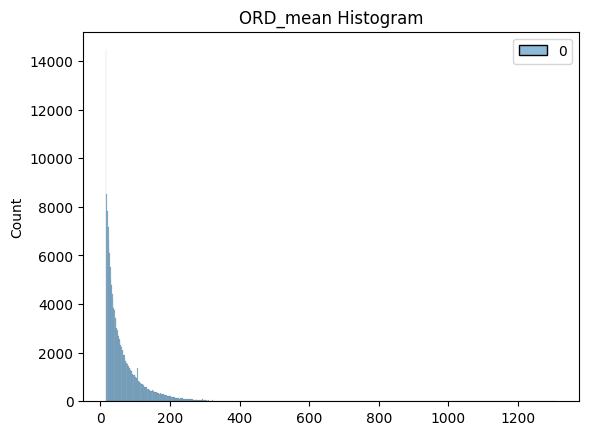

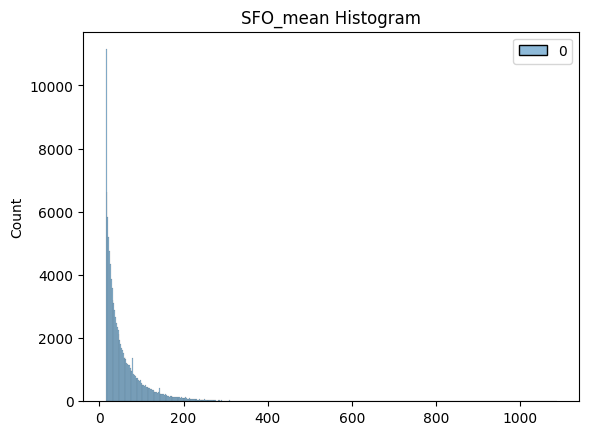

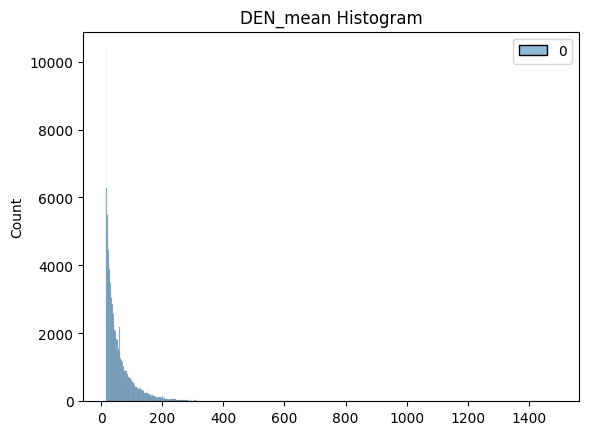

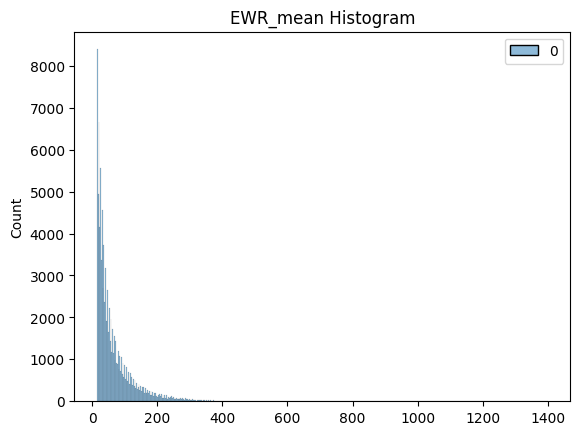

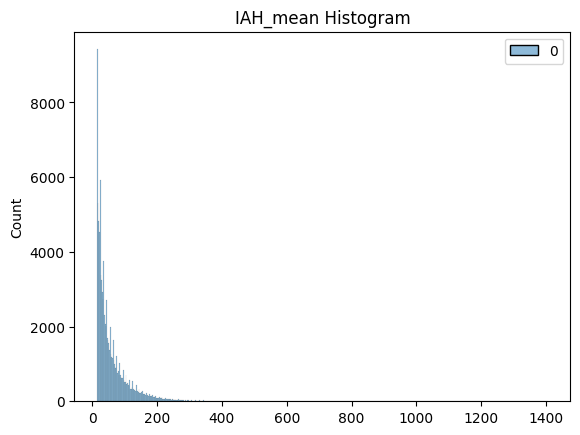

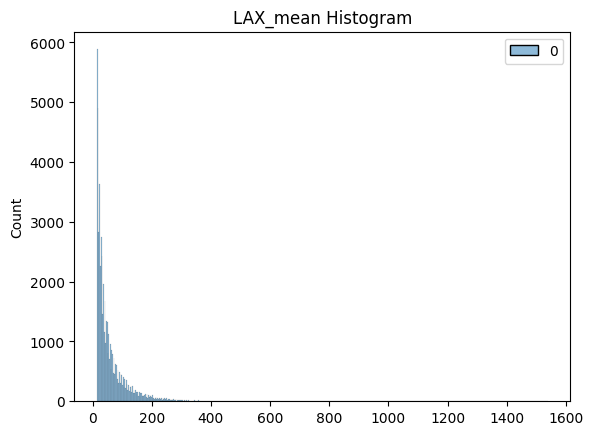

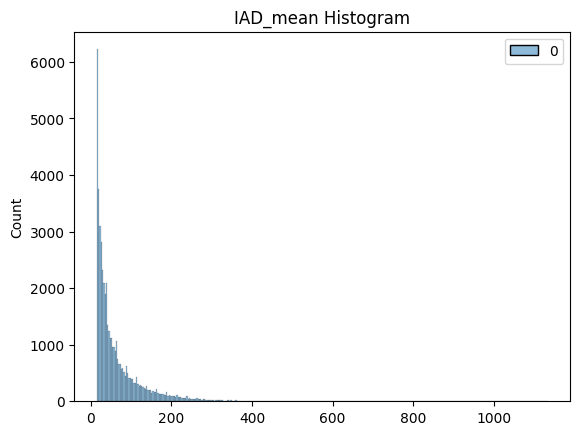

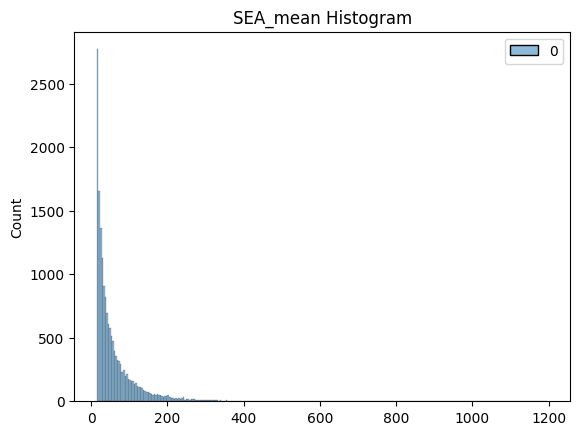

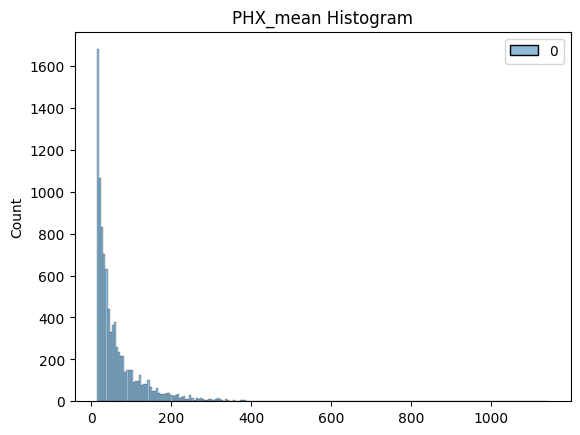

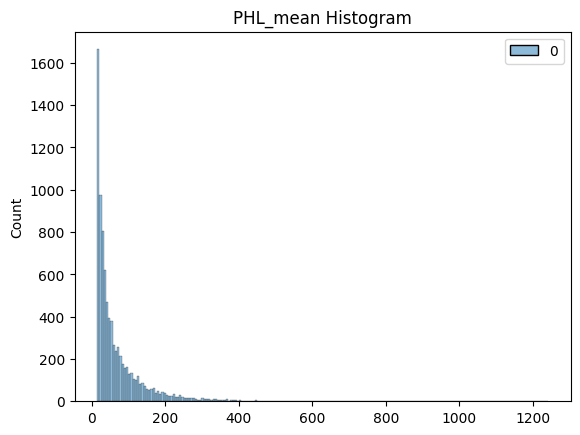

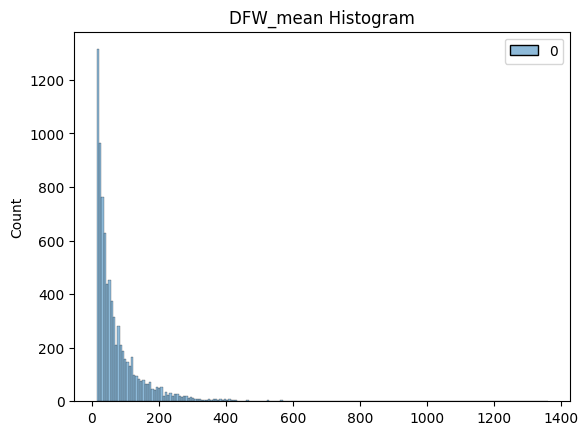

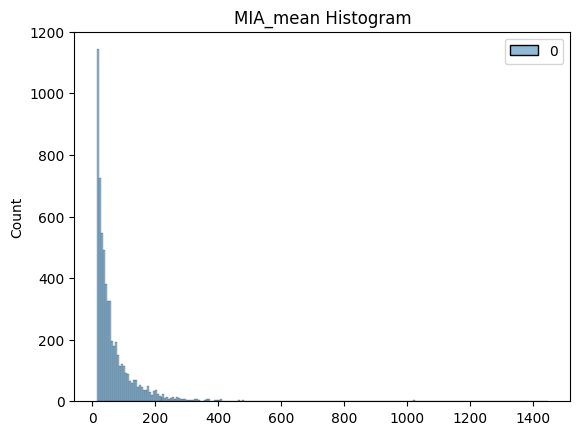

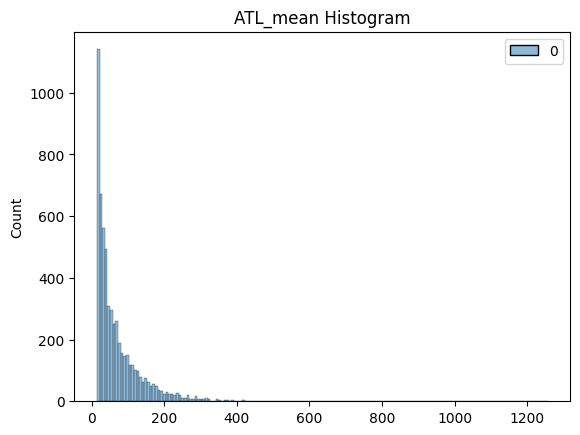

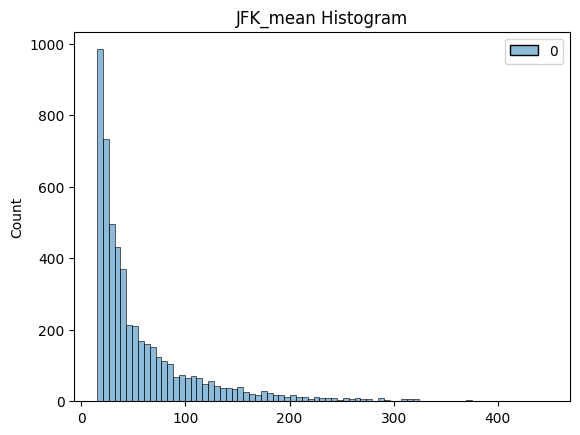

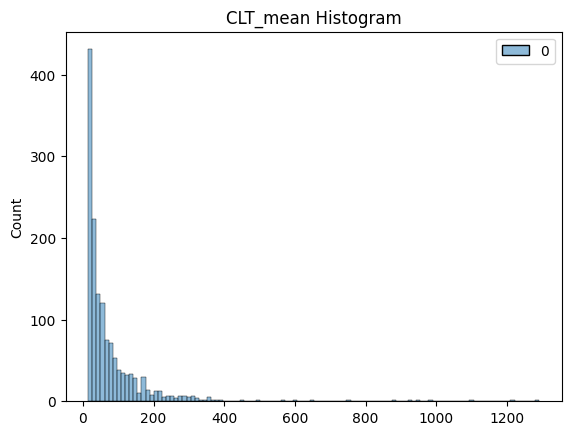

In [65]:
import seaborn as sns

for hist, name in zip(anova_mean_list, sorted_mean_list):
    
    sns.histplot(pd.DataFrame(hist))
    plt.title(f'{name} Histogram')  # Set the title for the plot
    plt.show()


In [66]:
m.anova_airport_test(flights)

(165.26107298063963, 0.0)

In [67]:
airport_dict['SFO_mean']

[20.0,
 30.0,
 28.0,
 51.0,
 15.0,
 70.0,
 16.0,
 29.0,
 41.0,
 189.0,
 268.0,
 74.0,
 96.0,
 116.0,
 22.0,
 61.0,
 43.0,
 38.0,
 82.0,
 65.0,
 67.0,
 329.0,
 22.0,
 97.0,
 36.0,
 133.0,
 41.0,
 61.0,
 75.0,
 23.0,
 28.0,
 41.0,
 56.0,
 82.0,
 128.0,
 78.0,
 57.0,
 127.0,
 50.0,
 54.0,
 43.0,
 207.0,
 24.0,
 62.0,
 19.0,
 204.0,
 68.0,
 91.0,
 87.0,
 22.0,
 127.0,
 99.0,
 213.0,
 28.0,
 20.0,
 34.0,
 16.0,
 68.0,
 87.0,
 20.0,
 16.0,
 44.0,
 33.0,
 21.0,
 106.0,
 32.0,
 29.0,
 39.0,
 21.0,
 97.0,
 74.0,
 41.0,
 21.0,
 53.0,
 99.0,
 32.0,
 22.0,
 16.0,
 16.0,
 31.0,
 19.0,
 28.0,
 82.0,
 24.0,
 30.0,
 116.0,
 29.0,
 65.0,
 15.0,
 23.0,
 80.0,
 42.0,
 25.0,
 15.0,
 52.0,
 85.0,
 18.0,
 16.0,
 39.0,
 26.0,
 31.0,
 299.0,
 19.0,
 16.0,
 64.0,
 54.0,
 17.0,
 32.0,
 32.0,
 21.0,
 61.0,
 24.0,
 18.0,
 209.0,
 24.0,
 15.0,
 23.0,
 104.0,
 59.0,
 64.0,
 62.0,
 21.0,
 26.0,
 23.0,
 18.0,
 112.0,
 41.0,
 87.0,
 99.0,
 150.0,
 51.0,
 61.0,
 65.0,
 155.0,
 26.0,
 15.0,
 70.0,
 133.0,
 38.0,
 28.0,


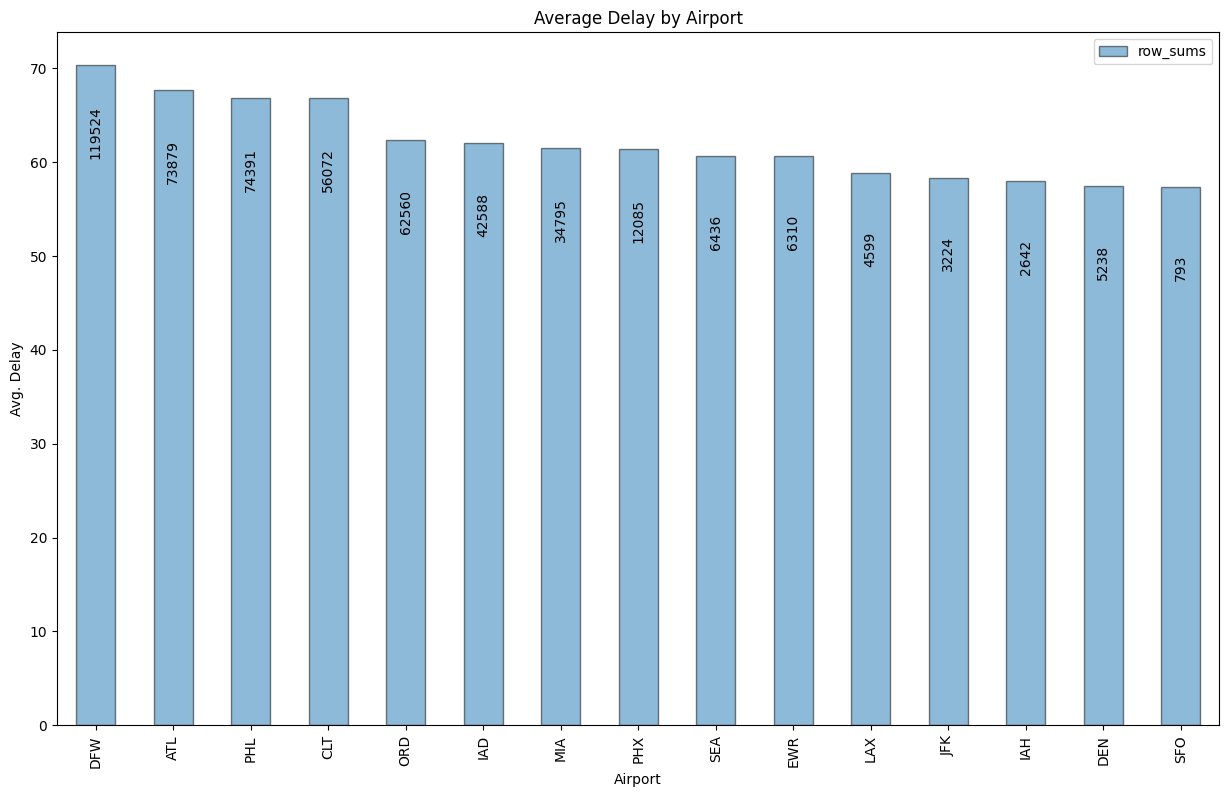

In [68]:

# Create the bar plot
ax = origin_row_grp.plot.bar(width=0.5, ec='black', alpha=.5, figsize=(15, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

# Get the heights and positions for text labels
ht_list = [ht for ht in origin_row_grp.row_sums]
pos_list = list(range(len(origin_row_grp)))
airport_val_list = [val for val in airport_count.ORIGIN]


# Loop through the data and add text labels inside the existing plot
for ht, pos, val in zip(ht_list, pos_list, airport_val_list):
    ax.text(pos, ht-10, val, fontsize=10, ha='center', va='bottom', rotation=90)  # Adjust ha and va as needed

# Show the plot
plt.show()


### Null Hypothesis:
The average delay in each airport are all the same.

### Alternative Hypothesis:
The average delay in each airport are not all the same.

### Is the mean at each airport equal or is there something causing  a difference?
### Anova Test

In [69]:
airport_count

,ORIGIN
ORD,119524
SFO,73879
DEN,74391
EWR,56072
IAH,62560
LAX,42588
IAD,34795
SEA,12085
PHX,6436
PHL,6310


In [70]:
airport_val_list

[119524,
 73879,
 74391,
 56072,
 62560,
 42588,
 34795,
 12085,
 6436,
 6310,
 4599,
 3224,
 2642,
 5238,
 793]

In [71]:
train.groupby([train.index.year, train.index.month]).mean()

average_delay
FL_DATE FL_DATE               
2009    1            54.424065
        2            54.377881
        3            55.424508
        4            61.722718
        5            57.292045
...                        ...
2016    8            64.503543
        9            59.785288
        10           60.862925
        11           59.518270
        12           60.601044

[96 rows x 1 columns]

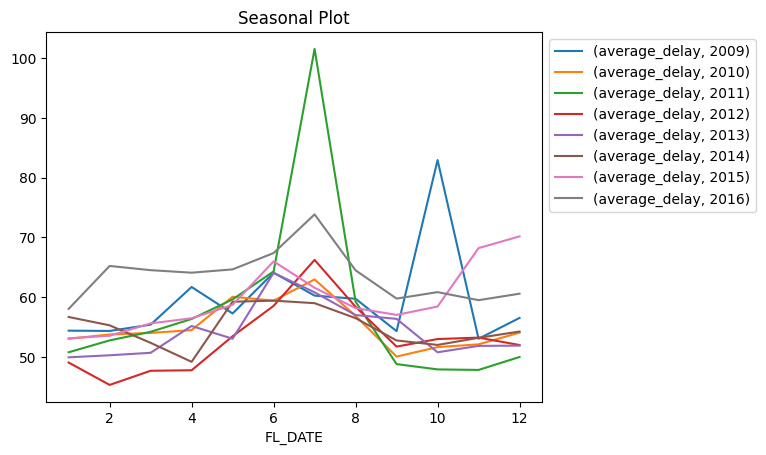

In [72]:
# .unstack turns an index level into columns
train.groupby([train.index.year, train.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

In [73]:
train


,average_delay
FL_DATE,
2009-01-01,51.248000
2009-01-02,68.795031
2009-01-03,52.456376
2009-01-04,43.675676
2009-01-05,46.297872
...,...
2016-12-27,53.531915
2016-12-28,51.117347
2016-12-29,51.971429


<Axes: xlabel='weekday', ylabel='average_delay'>

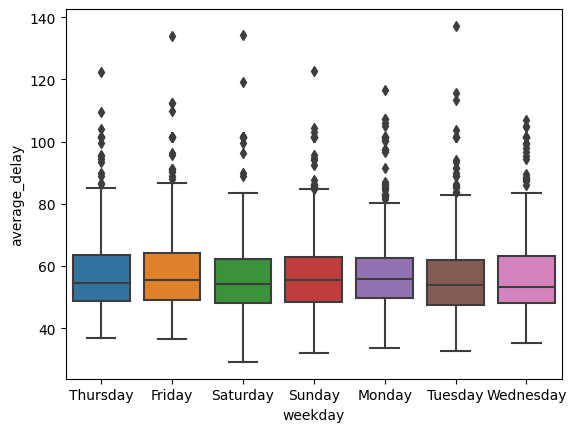

In [74]:
(
    train.reset_index()
    .assign(weekday=lambda train: train.FL_DATE.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='average_delay', x='weekday')
)

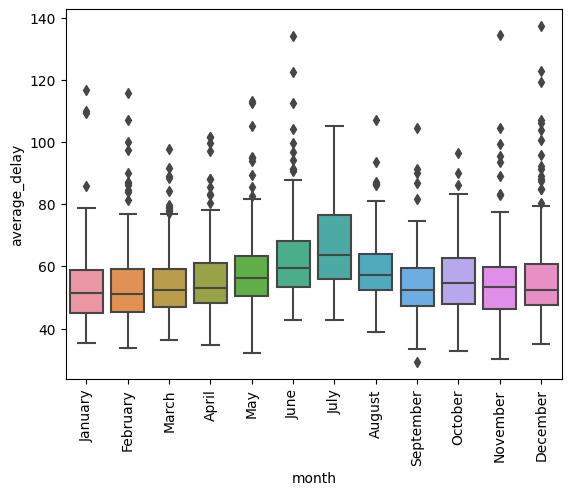

In [75]:
(
    train.reset_index()
    .assign(month=lambda train: train.FL_DATE.dt.month_name())
    .pipe((sns.boxplot, 'data'), y='average_delay', x='month')
)
plt.xticks(rotation=90)
plt.show()

In [76]:
train_fl.groupby([train_fl.index.year, train_fl.index.month])[col_to_sum].mean()

CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
FL_DATE FL_DATE                                                            
2009    1            16.501696       1.569525  14.872335        0.010174   
        2            13.329348       1.151359  17.281793        0.000000   
        3            15.535731       1.131948  15.211350        0.021719   
        4            16.684211       1.695316  17.335104        0.000000   
        5            14.274051       1.947264  16.708517        0.018535   
...                        ...            ...        ...             ...   
2016    8            18.967075       3.161812  14.771236        0.210159   
        9            21.380890       1.949114  15.065775        0.000000   
        10           20.273642       0.547284  16.481388        0.000000   
        11           19.452019       2.143291  15.284846        0.000000   
        12           20.056081       5.452921  14.626732        0.000000   

                 LATE_AIRCRAFT_DELAY  
FL_DATE FL_DATE                       
2009    1                  21.982316  
        2                  24.530978  
        3                  26.102989  
        4                  27.372284  
        5                  25.251324  
...                              ...  
2016    8                  29.201469  
        9                  23.976630  
        10                 25.359155  
        11                 23.938993  
        12                 26.287528  

[94 rows x 5 columns]

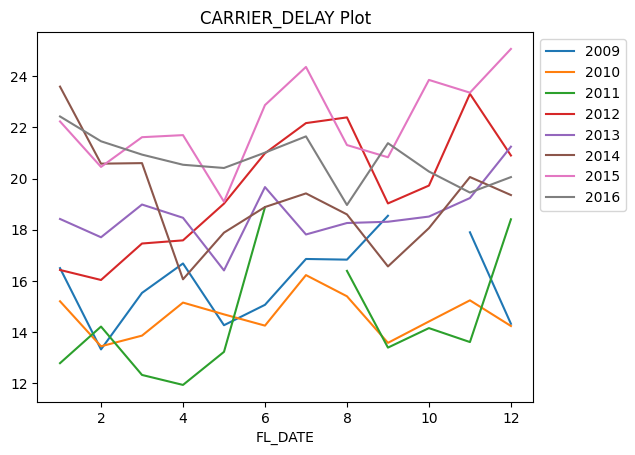

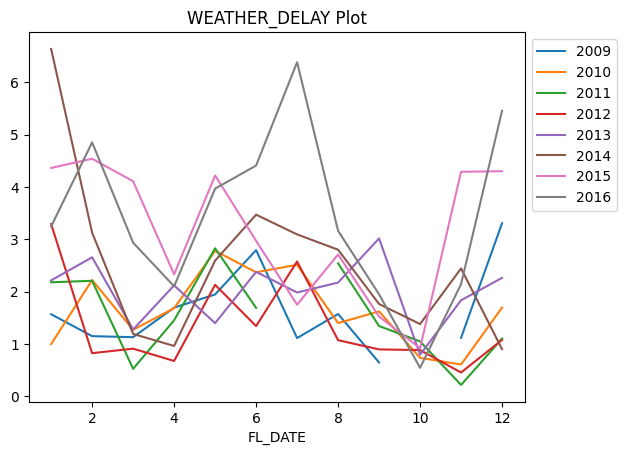

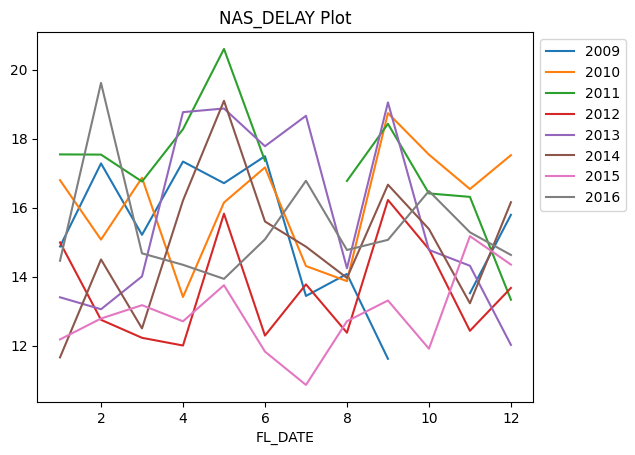

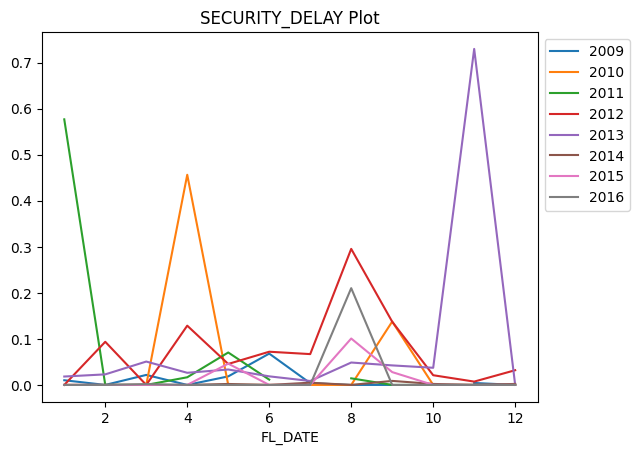

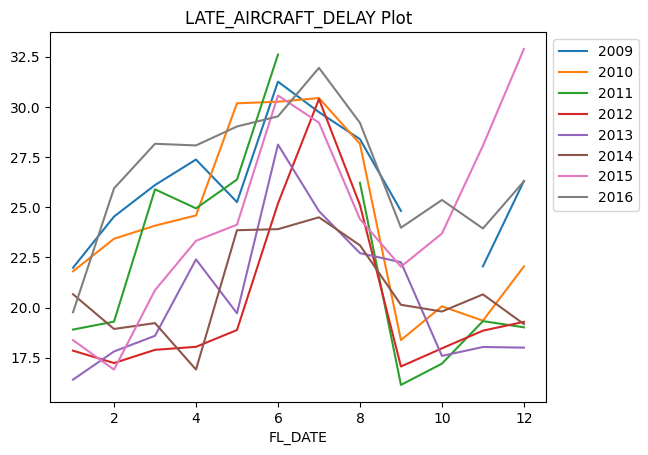

In [77]:
for col in col_to_sum:
    train_fl.groupby([train_fl.index.year, train_fl.index.month])[col].mean().unstack(0).plot(title=f'{col} Plot')
    plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
    plt.show()

### A look at histograms

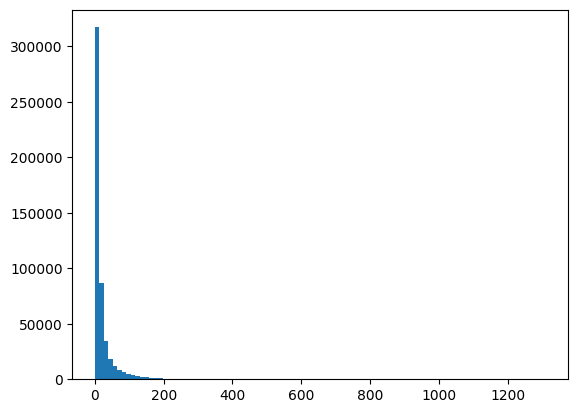

In [78]:
plt.hist(train_fl.CARRIER_DELAY, bins=100)
plt.show()

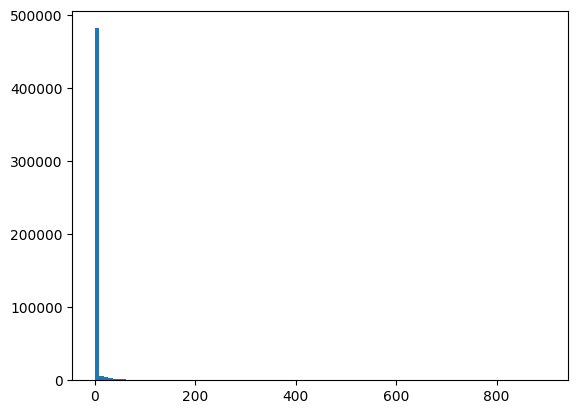

In [79]:
plt.hist(train_fl.WEATHER_DELAY, bins=100)
plt.show()

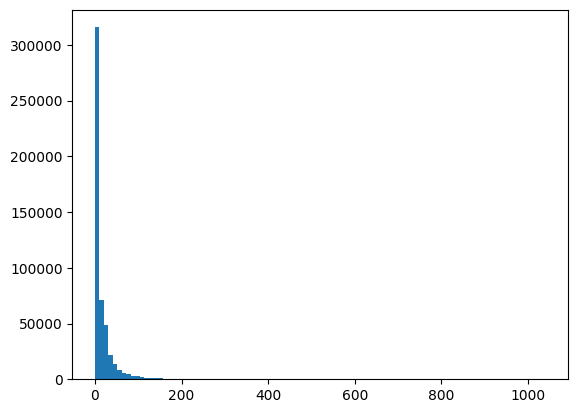

In [80]:
plt.hist(train_fl.NAS_DELAY, bins=100)
plt.show()

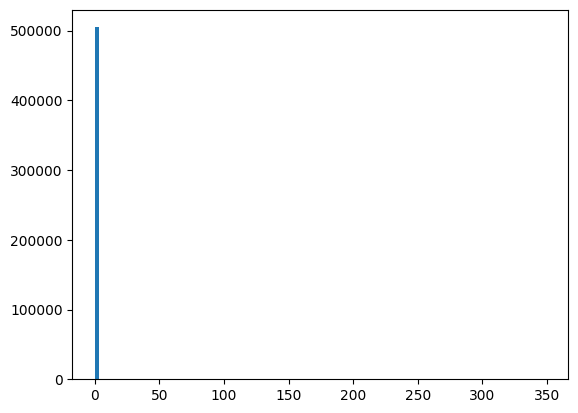

In [81]:
plt.hist(train_fl.SECURITY_DELAY, bins=100)
plt.show()

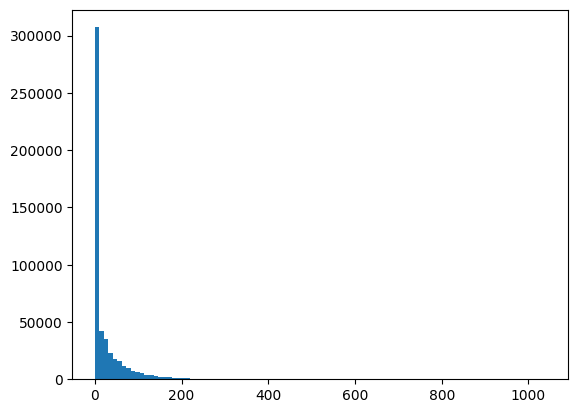

In [82]:
plt.hist(train_fl.LATE_AIRCRAFT_DELAY, bins=100)
plt.show()

### Find the best interval to define average delay by to optimize reducing noise while keeping good correlation results

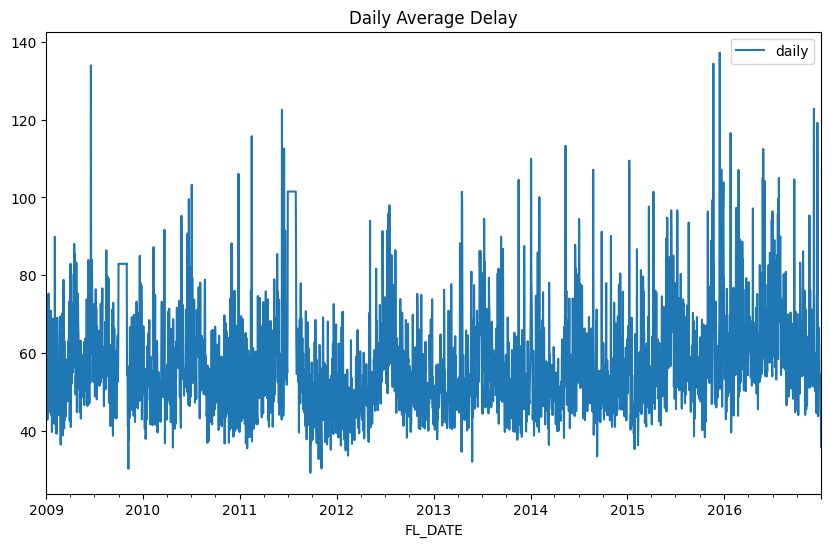

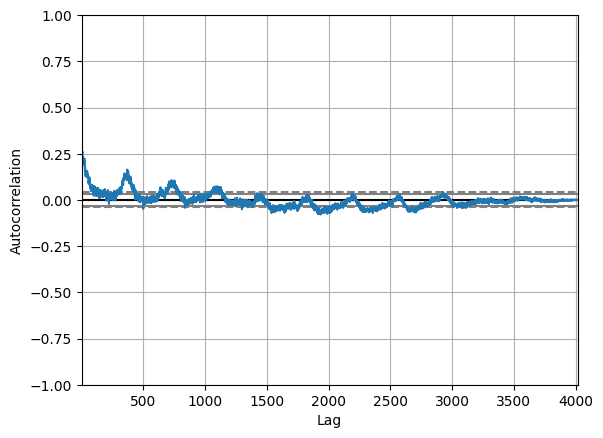

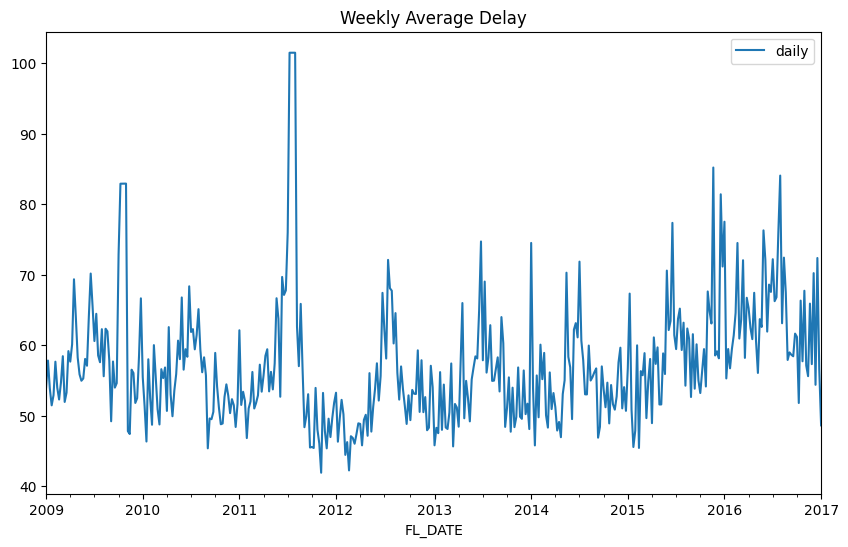

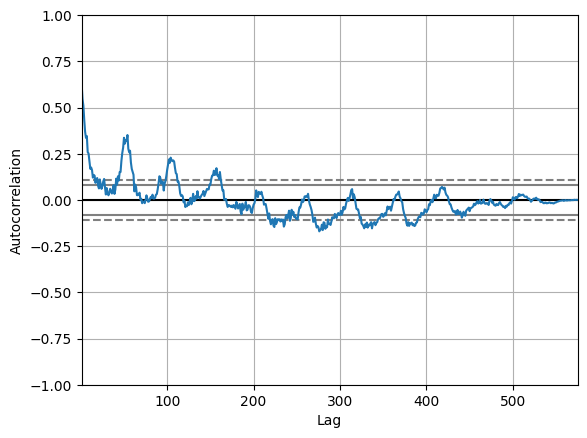

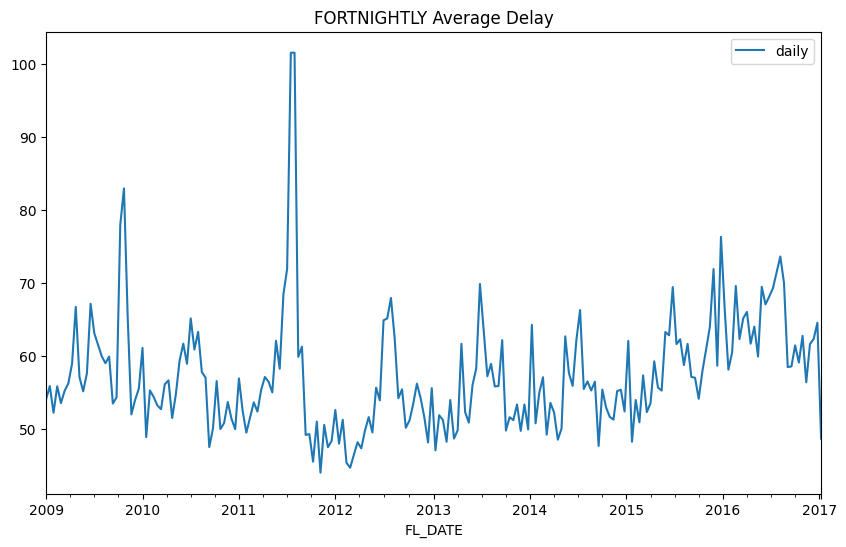

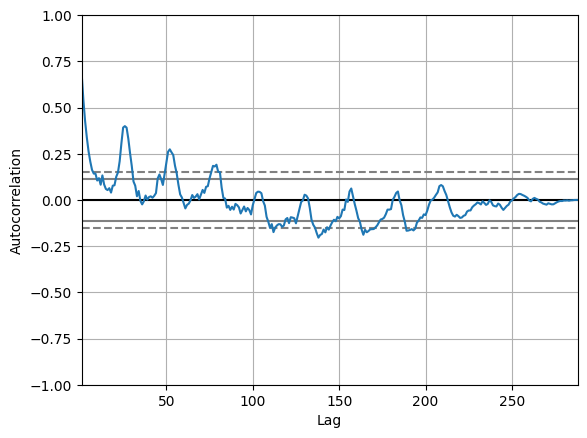

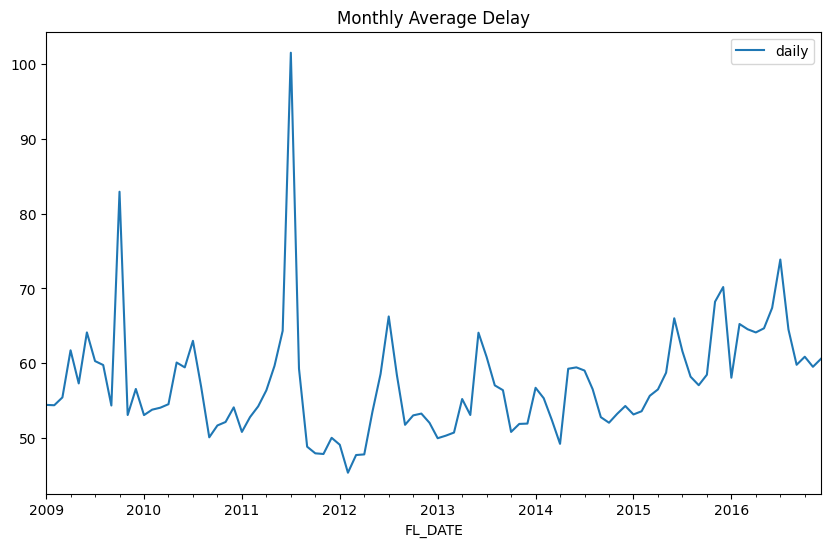

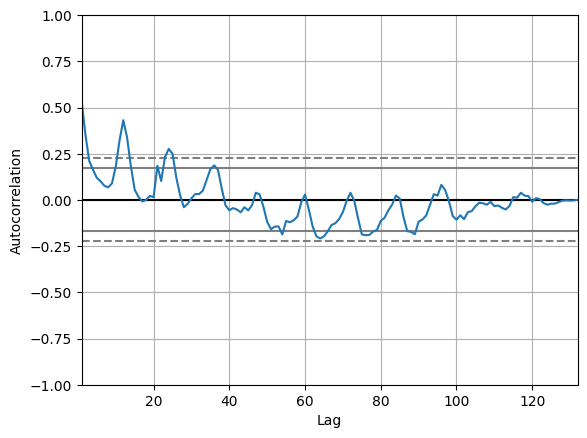

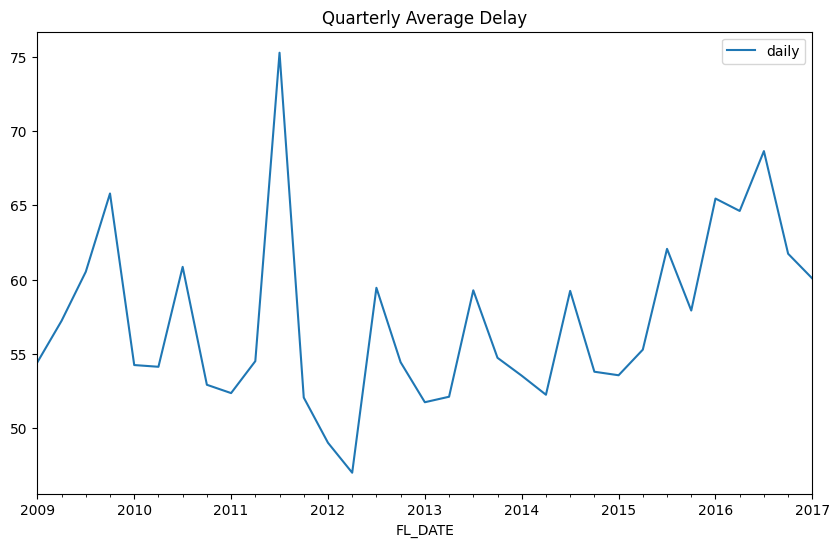

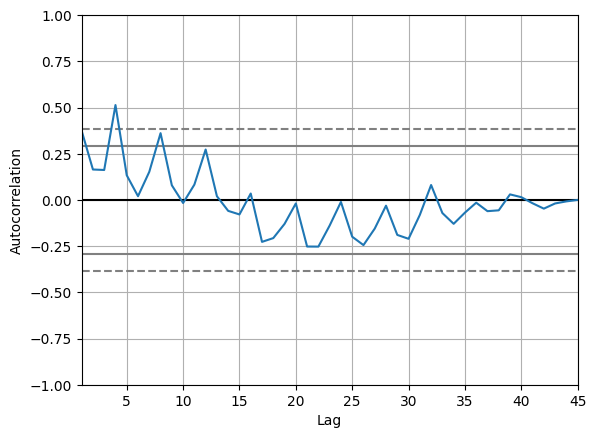

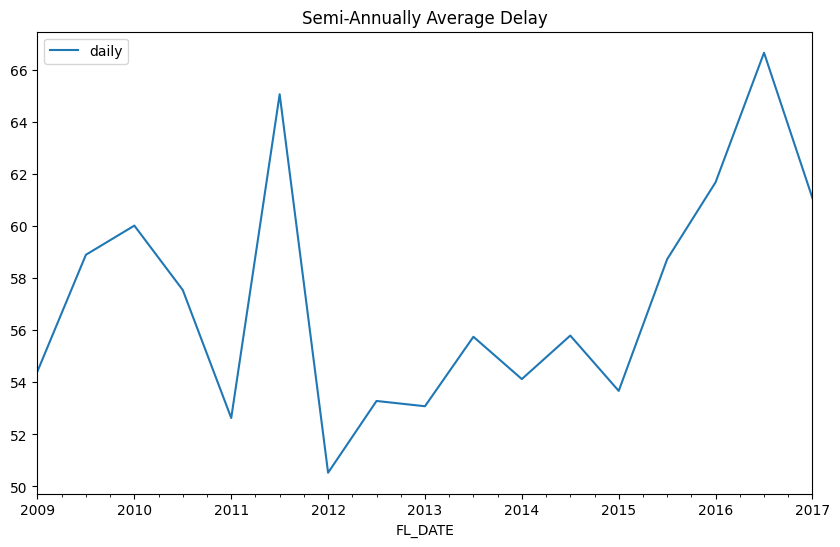

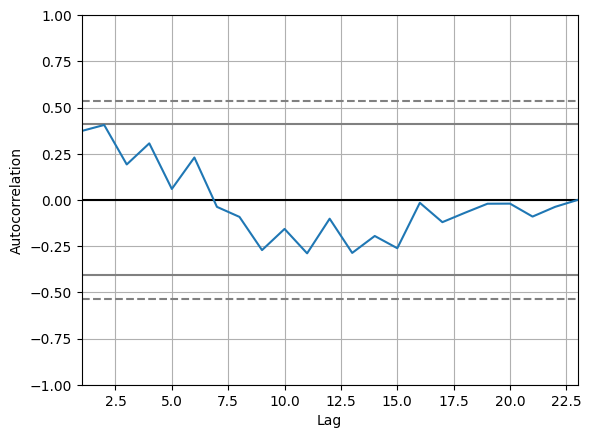

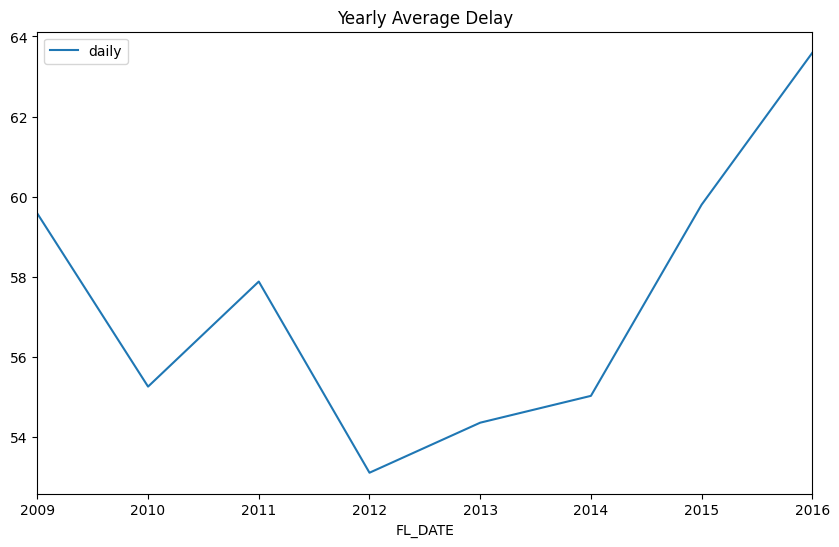

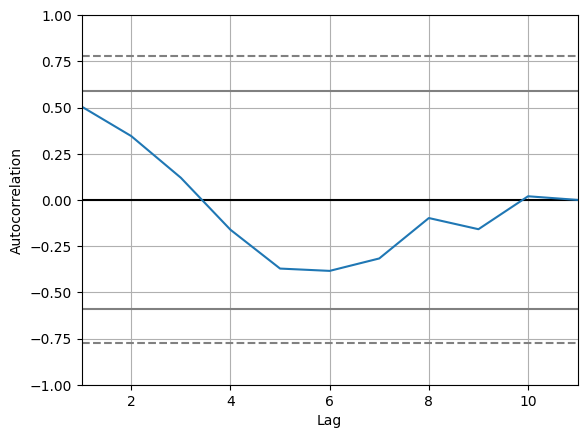

In [83]:
def plot_average_by_interval():
    
    resample_dict = {'D':'Daily', 'W':'Weekly', '2W':'FORTNIGHTLY', 'M':'Monthly', '3M':'Quarterly', '6M':'Semi-Annually', 'Y':'Yearly'}

    for _ in resample_dict:
        plt.figure(figsize=(10,6))

        train.resample(_).mean().average_delay.plot(label='daily')
        # flights_daily_mean.resample('W').mean().average_delay.plot(label='weekly')
        # flights_daily_mean.resample('M').mean().average_delay.plot(label='monthly')
        # flights_daily_mean.resample('Y').mean().average_delay.plot(label='yearly')


        plt.title(f'{resample_dict[_][0:]} Average Delay')
        plt.legend()
        plt.show()

        pd.plotting.autocorrelation_plot(df.average_delay.resample(_).mean())
        plt.show()

plot_average_by_interval()

### Function for lag plot 

In [84]:
def plot_best_lag_plot(sample, lag):

    #Plots the best correlated lag
    pd.plotting.lag_plot(train.resample(sample).mean(), lag=lag)
    #plt.ylabel(f'{sample} Lagged Values')
    #plt.title(f'{sample}lag plot');



## Pearson R Testing

### Is there a correlation?

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

In [86]:
len(train.resample('y').mean().values[0:-1])

7

In [87]:
len(train.resample('y').mean().values[1:])

7

In [88]:
# for (x, y) in zip(flattened_x, flattened_y):
#     print(x,y)

In [89]:
# for i in train.resample('m').mean().values:
#     np.array(i)
#     flattened_list = [item for sublist in nested_list for item in sublist]
#     print(i)

# Pearoson's R Testing

### Monthly Testing

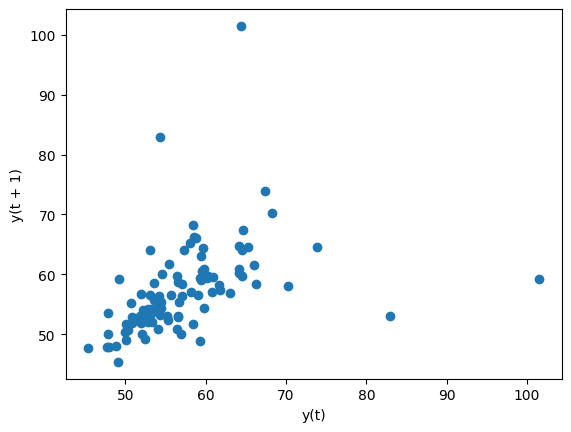

In [90]:
plot_best_lag_plot('m', 1)

In [91]:
# Removing the array from each list
flattened_x = [item for sublist in train.resample('m').mean().values[0:-1] for item in sublist]
# Removing the array from each list
flattened_y = [item for sublist in train.resample('m').mean().values[1:] for item in sublist]


In [92]:
corr, p = stats.pearsonr(flattened_x, flattened_y)#, (train.resample('1m'))
corr, p


(0.4126075883649748, 3.25206336117072e-05)

In [93]:
m.pearsons_r_test(train)

(0.4126075883649748, 3.25206336117072e-05)

### Weekly Testing

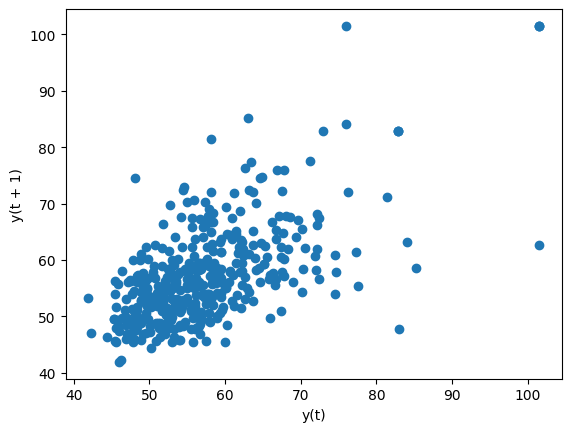

In [94]:
plot_best_lag_plot('w', 1)

In [95]:
# Removing the array from each list
flattened_x = [item for sublist in train.resample('w').mean().values[0:-1] for item in sublist]
# Removing the array from each list
flattened_y = [item for sublist in train.resample('w').mean().values[1:] for item in sublist]


In [96]:
corr, p = stats.pearsonr(flattened_x, flattened_y)#, (train.resample('1m'))
corr, p


(0.6261072452615899, 8.971678133426774e-47)

### 2 Week Testing

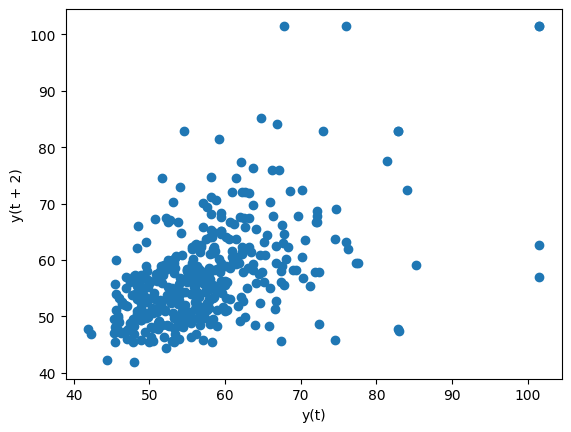

In [97]:
plot_best_lag_plot('w', 2)

In [98]:
# Removing the array from each list
flattened_x = [item for sublist in train.resample('2w').mean().values[0:-1] for item in sublist]
# Removing the array from each list
flattened_y = [item for sublist in train.resample('2w').mean().values[1:] for item in sublist]


In [99]:
corr, p = stats.pearsonr(flattened_x, flattened_y)#, (train.resample('1m'))
corr, p


(0.6309836643701311, 1.3124382231038833e-24)

### Plot the seasonal decompositions for the various time periods

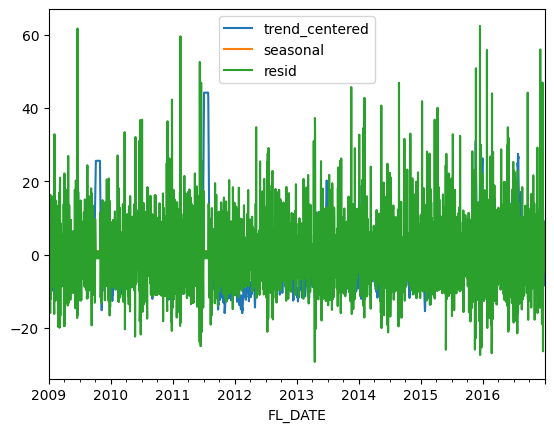

In [100]:
y = train.average_delay.resample('d').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

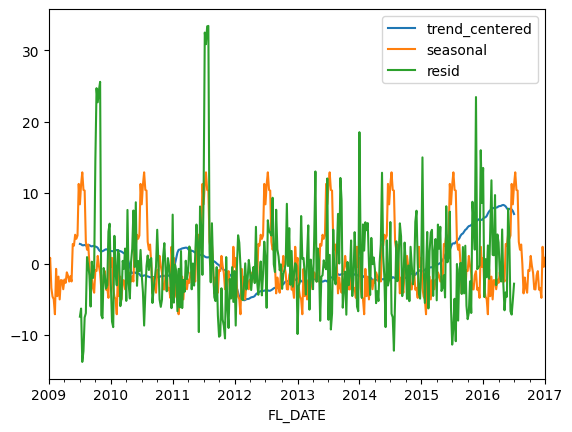

In [101]:
y = train.average_delay.resample('w').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

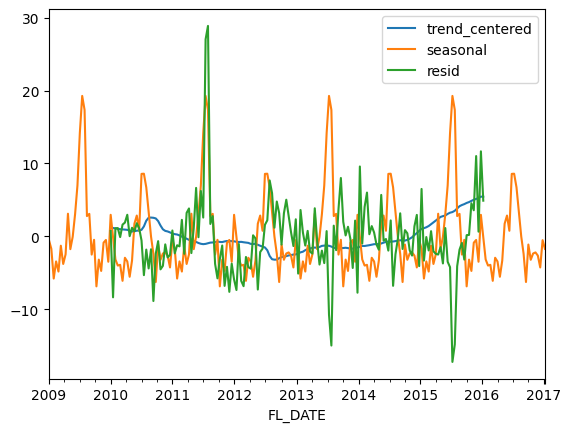

In [102]:
def seasonal_decomposition_plot(duration):
    y = train.average_delay.resample(duration).mean()

    result = sm.tsa.seasonal_decompose(y)

    decomposition = pd.DataFrame({
        'y': result.observed,
        'trend': result.trend,
        'seasonal': result.seasonal,
        'resid': result.resid
    })

    decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
    decomposition[['trend_centered', 'seasonal', 'resid']].plot();
    
seasonal_decomposition_plot('2w')

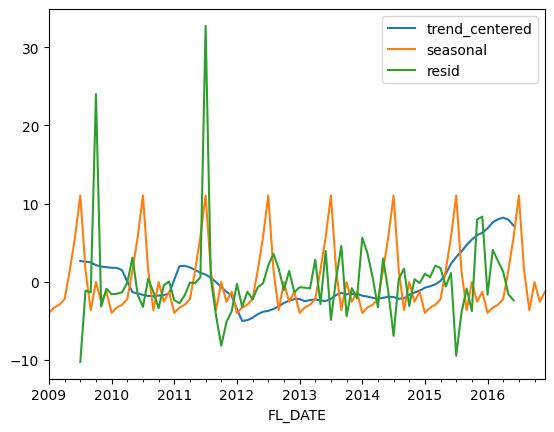

In [103]:
y = train.average_delay.resample('m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

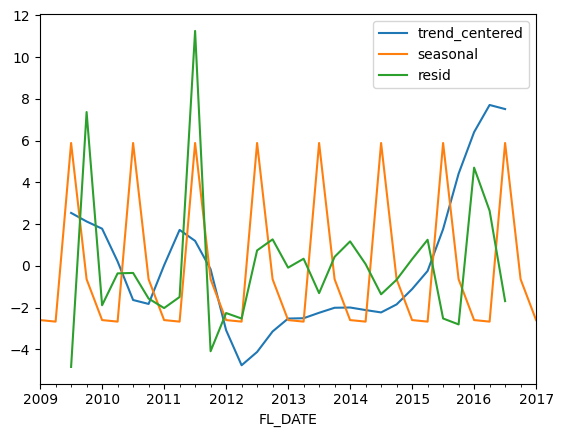

In [104]:
y = train.average_delay.resample('3m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

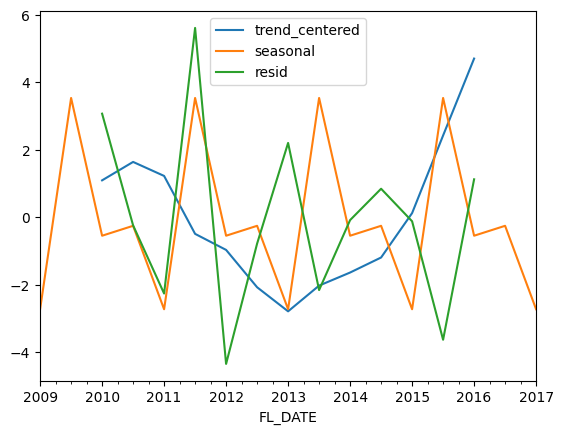

In [105]:
y = train.average_delay.resample('6m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

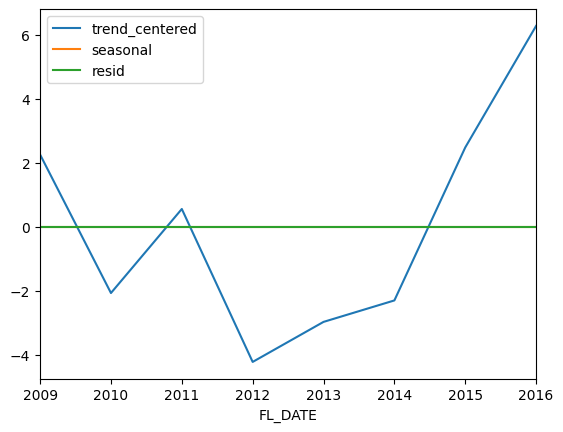

In [106]:
y = train.average_delay.resample('y').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

In [107]:
import pandas as pd

def sort_rows_highest_to_lowest(df):
    """
    Sort each row in a DataFrame from highest to lowest value.
    
    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    DataFrame: A new DataFrame with rows sorted.
    """
    # Use the apply method to sort each row
    sorted_df = df.apply(lambda row: sorted(row, reverse=True), axis=1)
    
    return sorted_df


